In [238]:
from datetime import datetime, timedelta
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import scipy.stats as stats
import seaborn as sns
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
%matplotlib notebook

import networkx as nx
from networkx.algorithms.components.connected import connected_components

#show up to 100 columns.
pd.set_option('display.max_columns', 100)

In [2]:
data_file = "new_theorem_data.p"

## data appears to have been savied in Python 2 - changing encoding allows us to properly load data
with open(data_file, 'rb') as pickle_file:
    data = pickle.load(pickle_file, encoding='latin1') 

In [3]:
data.head()

,ListingID,DateCreditPulled,DateListingStart,DateListingCreation,EnumListingStatus,DolLoanAmountRequested,BoolPartialFundingApproved,CreditGrade,LenderYield,BorrowerRate,NumMonthsTerm,DolMonthlyLoanPayment,FICOScore,ProsperScore,EnumListingCategory,DolMonthlyIncome,BoolIncomeVerifiable,FracDebtToIncomeRatio,StrEmploymentStatus,StrOccupation,NumMonthsEmployed,StrState,StrBorrowerCity,NumPriorProsperLoansActive,NumPriorProsperLoans,DolPriorProsperLoansPrincipalBorrowed,DolPriorProsperLoansPrincipalOutstanding,DolPriorProsperLoansBalanceOutstanding,NumPriorProsperLoansCyclesBilled,NumPriorProsperLoansOnTimePayments,NumPriorProsperLoansLateCycles,NumPriorProsperLoansLatePayments,DolMaxPriorProsperLoan,DolMinPriorProsperLoan,NumPriorProsperLoansEarliestPayOff,NumPriorProsperLoans31dpd,NumPriorProsperLoans61dpd,BoolIsLender,BoolInGroup,EnumChannelCode,NumTrades,NumTradesOpened6,NumTradesDelinqOrPastDue6,NumOpenTradesDelinqOrPastDue6,NumTradesCurr30DPDOrDerog6,NumTradesEver90DPDOrDerog,DolTotalBalanceAllOpenTrades6,DolTotalBalanceOnPublicRecords,DolTotalPaymentAllOpenTrades6,AgeOldestTrade,NumInquiries6MinusLastTwoWeeks,PctTradesNeverDelinquent,NumBankcardTradesOpened12,DolTotalAvailBankcardCredit6,DolTotalBalanceInstallTradesReptd6,NumRealEstateTrades,NumRealPropertyTrades,DolTotalBalanceOpenRevolving6,NumTradesEverDerog,DolMonthlyDebt,NumCurrentDelinquencies,NumDelinquencies84,NumPublicRecordsLast10Years,NumPublicRecords12,DateFirstCredit,NumCreditLines84,NumInquiries6,DolAmountDelinquent,NumCurrentCreditLines,NumOpenCreditLines,PctBankcardUtil,NumOpenRevolvingAccounts,DolRealEstateBalance,DolRevolvingBalance,DolRealEstatePayment,NumTotalInquiries,NumSatisfactoryAccounts,NumWasDelinquentDerog,NumDelinquenciesOver30Days,NumDelinquenciesOver60Days,BoolOwnsHome,EnumLoanFractionalType,DateWholeLoanStart,DateWholeLoanEnd,BoolEverWholeLoan,BoolIsFractionalLoan
ListingNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
973605,973605,2013-10-13 01:50:58,2014-01-26 19:00:08.887,2013-10-13 01:50:56.287,7,15000.0,True,B,0.1520,0.1620,60,366.37,689,6.0,1,6000.0000,True,0.27,Employed,Tradesman - Mechanic,445.0,VA,VIRGINIA BCH,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,False,70000,29,1,0,0,0,0,121431,0,1348,419,0,96,4,439,0,2,4,33956,0,1242,0,1,0,0,1978-11-03 08:00:00,35,0,0,11,8,0.97,7,87475,52941,583,5,33,2,8,1,True,3,2014-01-26 18:28:42.477,NaT,True,False
981099,981099,2013-10-15 15:22:06,2014-01-10 00:00:16.530,2013-10-15 15:22:03.990,7,15000.0,True,B,0.1485,0.1585,60,363.58,709,8.0,1,7916.6667,True,0.35,Other,NaN,32.0,CA,ACTON,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,False,70000,50,1,0,0,0,0,698295,0,4845,430,0,100,7,9609,142383,2,4,14852,0,2289,0,0,0,0,1977-12-01 08:00:00,54,0,0,15,14,0.48,10,541060,17064,2611,3,53,1,2,1,True,2,2014-01-09 23:49:48.150,NaT,True,False
1025766,1025766,2013-11-06 23:09:36,2014-01-22 01:00:30.420,2013-11-06 23:09:33.137,6,4000.0,True,D,0.1985,0.2085,36,150.39,669,6.0,1,2083.3333,True,0.53,Employed,Professional,4.0,MN,MINNEAPOLIS,1,3,14400.0,4440.72,4442.52,52.0,52.0,0.0,0.0,8000.0,1400.0,10.0,NaN,NaN,0,False,80000,15,0,0,0,0,1,30590,0,901,100,2,86,5,1498,9788,0,0,20802,1,911,0,2,0,0,2005-07-19 07:00:00,17,2,0,8,7,0.93,5,0,20802,0,5,15,2,3,2,False,1,NaT,NaT,False,True
1003835,1003835,2013-11-08 02:25:29,2014-01-03 00:00:09.013,2013-11-08 02:25:27.187,7,10000.0,True,A,0.1199,0.1299,36,336.89,749,5.0,13,3750.0000,True,0.14,Employed,Medical Technician,2.0,OK,OKLAHOMA CITY,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,False,90000,8,1,0,0,0,0,3100,0,223,60,0,100,3,6050,0,0,0,3100,0,223,0,0,0,0,2008-11-04 08:00:00,8,0,0,7,7,0.26,7,0,3100,0,1,8,0,0,0,False,3,2014-01-02 23:47:33.943,NaT,True,False
1011335,1011335,2013-11-11 22:08:44,2014-01-10 01:02:19.547,2013-11-11 22:08:41.660,6,20000.0,True,B,0.1340,0.1440,60,469.52,649,11.0,1,9000.0000,True,0.16,Employed,Executive,90.0,MN,BELLE PLAINE,0,1,2600.0,0.00,0.00,33.0,31.0,2.0,0.0,2600.0,2600.0,34.0,N

In [4]:
data.iloc[0]

ListingID                                                       973605
DateCreditPulled                                   2013-10-13 01:50:58
DateListingStart                            2014-01-26 19:00:08.887000
DateListingCreation                         2013-10-13 01:50:56.287000
EnumListingStatus                                                    7
DolLoanAmountRequested                                           15000
BoolPartialFundingApproved                                        True
CreditGrade                                                          B
LenderYield                                                      0.152
BorrowerRate                                                     0.162
NumMonthsTerm                                                       60
DolMonthlyLoanPayment                                           366.37
FICOScore                                                          689
ProsperScore                                                         6
EnumLi

In [5]:
## deprecated command - use loc or iloc instead
data.iloc[200000]

ListingID                                                             2254177
DateCreditPulled                                          2015-01-14 19:47:39
DateListingStart                                   2015-01-16 00:04:11.883000
DateListingCreation                                2015-01-14 19:47:36.920000
EnumListingStatus                                                           6
DolLoanAmountRequested                                                  10000
BoolPartialFundingApproved                                               True
CreditGrade                                                                 D
LenderYield                                                              0.18
BorrowerRate                                                             0.19
NumMonthsTerm                                                              60
DolMonthlyLoanPayment                                                  259.41
FICOScore                                                       

In [6]:
names = data.columns.values
print(names)

['ListingID' 'DateCreditPulled' 'DateListingStart' 'DateListingCreation'
 'EnumListingStatus' 'DolLoanAmountRequested' 'BoolPartialFundingApproved'
 'CreditGrade' 'LenderYield' 'BorrowerRate' 'NumMonthsTerm'
 'DolMonthlyLoanPayment' 'FICOScore' 'ProsperScore' 'EnumListingCategory'
 'DolMonthlyIncome' 'BoolIncomeVerifiable' 'FracDebtToIncomeRatio'
 'StrEmploymentStatus' 'StrOccupation' 'NumMonthsEmployed' 'StrState'
 'StrBorrowerCity' 'NumPriorProsperLoansActive' 'NumPriorProsperLoans'
 'DolPriorProsperLoansPrincipalBorrowed'
 'DolPriorProsperLoansPrincipalOutstanding'
 'DolPriorProsperLoansBalanceOutstanding'
 'NumPriorProsperLoansCyclesBilled' 'NumPriorProsperLoansOnTimePayments'
 'NumPriorProsperLoansLateCycles' 'NumPriorProsperLoansLatePayments'
 'DolMaxPriorProsperLoan' 'DolMinPriorProsperLoan'
 'NumPriorProsperLoansEarliestPayOff' 'NumPriorProsperLoans31dpd'
 'NumPriorProsperLoans61dpd' 'BoolIsLender' 'BoolInGroup' 'EnumChannelCode'
 'NumTrades' 'NumTradesOpened6' 'NumTradesDelinq

In [7]:
len(data)

252469

In [8]:
len(names)

86

In [9]:
corr = data.corr()

In [10]:
corr.head()

,ListingID,EnumListingStatus,DolLoanAmountRequested,BoolPartialFundingApproved,LenderYield,BorrowerRate,NumMonthsTerm,DolMonthlyLoanPayment,FICOScore,ProsperScore,EnumListingCategory,DolMonthlyIncome,BoolIncomeVerifiable,FracDebtToIncomeRatio,NumMonthsEmployed,NumPriorProsperLoansActive,NumPriorProsperLoans,DolPriorProsperLoansPrincipalBorrowed,DolPriorProsperLoansPrincipalOutstanding,DolPriorProsperLoansBalanceOutstanding,NumPriorProsperLoansCyclesBilled,NumPriorProsperLoansOnTimePayments,NumPriorProsperLoansLateCycles,NumPriorProsperLoansLatePayments,DolMaxPriorProsperLoan,DolMinPriorProsperLoan,NumPriorProsperLoansEarliestPayOff,NumPriorProsperLoans31dpd,NumPriorProsperLoans61dpd,BoolIsLender,BoolInGroup,NumTrades,NumTradesOpened6,NumTradesDelinqOrPastDue6,NumOpenTradesDelinqOrPastDue6,NumTradesCurr30DPDOrDerog6,NumTradesEver90DPDOrDerog,DolTotalBalanceAllOpenTrades6,DolTotalBalanceOnPublicRecords,DolTotalPaymentAllOpenTrades6,AgeOldestTrade,NumInquiries6MinusLastTwoWeeks,PctTradesNeverDelinquent,NumBankcardTradesOpened12,DolTotalAvailBankcardCredit6,DolTotalBalanceInstallTradesReptd6,NumRealEstateTrades,NumRealPropertyTrades,DolTotalBalanceOpenRevolving6,NumTradesEverDerog,DolMonthlyDebt,NumCurrentDelinquencies,NumDelinquencies84,NumPublicRecordsLast10Years,NumPublicRecords12,NumCreditLines84,NumInquiries6,DolAmountDelinquent,NumCurrentCreditLines,NumOpenCreditLines,PctBankcardUtil,NumOpenRevolvingAccounts,DolRealEstateBalance,DolRevolvingBalance,DolRealEstatePayment,NumTotalInquiries,NumSatisfactoryAccounts,NumWasDelinquentDerog,NumDelinquenciesOver30Days,NumDelinquenciesOver60Days,BoolOwnsHome,EnumLoanFractionalType,BoolEverWholeLoan,BoolIsFractionalLoan
ListingID,1.000000,-0.047446,0.059042,-0.012594,-0.193550,-0.095764,-0.034627,0.060026,-0.029183,0.061927,0.010128,-0.004322,-0.002613,0.026718,0.000620,0.016908,-0.007932,0.027645,0.111947,0.111217,-0.146137,-0.144158,-0.044595,-0.003856,0.105169,0.151630,-0.086201,0.047974,-0.079389,-0.027607,-0.014724,-0.035760,0.038462,0.028354,0.023143,0.028239,0.015311,-0.032022,0.007499,-0.023510,-0.032103,0.042105,-0.030741,-0.000733,0.002348,0.003260,-0.047596,-0.046997,-0.035612,0.010666,-0.016083,0.038000,0.025286,-0.009192,0.008697,-0.038984,0.035188,0.006352,-0.008618,-0.003126,-0.045380,0.009111,-0.029049,-0.036270,-0.022091,0.049090,-0.049322,0.018786,0.027562,0.020997,-0.042558,0.102529,0.042467,-0.059077
EnumListingStatus,-0.047446,1.000000,0.075315,0.000953,-0.121828,-0.006793,0.014387,0.077843,0.037387,-0.011962,0.034750,0.024876,0.071998,-0.035491,-0.027026,-0.094263,-0.095947,-0.046296,-0.064476,-0.064332,0.019202,0.018362,0.011328,0.011056,-0.051799,-0.046215,0.022653,0.097274,0.272419,-0.023001,-0.009886,-0.020362,0.010713,0.007539,0.006576,0.005162,-0.035315,-0.035291,0.003367,-0.042469,-0.001963,0.036700,0.037831,0.032306,0.064314,-0.049365,-0.033749,-0.037761,0.005053,-0.032122,-0.049077,-0.006335,-0.029396,-0.021918,0.003105,-0.032600,0.047952,-0.000093,-0.012848,-0.011501,-0.066950,0.031253,-0.028279,0.003057,-0.024352,0.027625,-0.022928,-0.038987,-0.038802,-0.037447,-0.044487,-0.001641,-0.001321,0.001096
DolLoanAmountRequested,0.059042,0.075315,1.000000,0.258246,-0.197292,-0.195014,0.234371,0.941740,0.211397,0.330753,-0.137808,0.065159,0.094821,0.071365,0.065185,-0.037012,-0.026956,0.305478,0.066360,0.066243,-0.010112,-0.007437,-0.027015,-0.003130,0.346567,0.302377,-0.009951,-0.013279,0.013008,0.006399,-0.001842,0.194365,-0.038050,-0.048527,-0.009997,-0.052590,-0.159680,0.305535,0.000809,0.322254,0.116335,-0.006507,0.201711,0.228595,0.213128,0.147314,0.198524,0.184692,0.250881,-0.155935,0.343582,-0.081683,-0.113162,-0.131044,-0.003206,0.162318,-0.007823,-0.005944,0.209541,0.210411,0.024868,0.167996,0.254258,0.241303,0.202862,0.010963,0.217695,-0.143378,-0.105743,-0.123465,0.211097,0.042040,0.049357,-0.042310
BoolPartialFundingApproved,-0.012594,0.000953,0.258246,1.000000,-0.036286,-0.034665,0.086298,0.256963,0.009224,0.062897,-0.126670,-0.003294,-0.006640,0.0

In [11]:
corr['EnumListingStatus'][20:]

NumPriorProsperLoansCyclesBilled      0.019202
NumPriorProsperLoansOnTimePayments    0.018362
NumPriorProsperLoansLateCycles        0.011328
NumPriorProsperLoansLatePayments      0.011056
DolMaxPriorProsperLoan               -0.051799
DolMinPriorProsperLoan               -0.046215
NumPriorProsperLoansEarliestPayOff    0.022653
NumPriorProsperLoans31dpd             0.097274
NumPriorProsperLoans61dpd             0.272419
BoolIsLender                         -0.023001
BoolInGroup                          -0.009886
NumTrades                            -0.020362
NumTradesOpened6                      0.010713
NumTradesDelinqOrPastDue6             0.007539
NumOpenTradesDelinqOrPastDue6         0.006576
NumTradesCurr30DPDOrDerog6            0.005162
NumTradesEver90DPDOrDerog            -0.035315
DolTotalBalanceAllOpenTrades6        -0.035291
DolTotalBalanceOnPublicRecords        0.003367
DolTotalPaymentAllOpenTrades6        -0.042469
AgeOldestTrade                       -0.001963
NumInquiries6

<IPython.core.display.Javascript object>


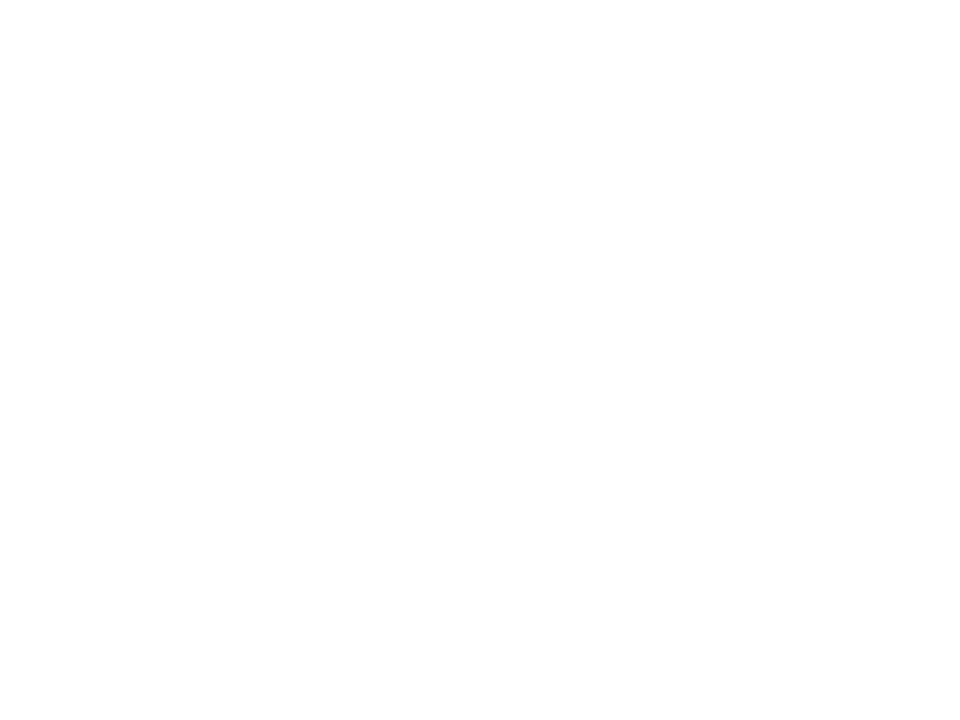

In [12]:
## 86 different categories - start by taking correlation matrix to figure out which categories are redundant
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corr, square=True)

In [13]:
corr.head()

,ListingID,EnumListingStatus,DolLoanAmountRequested,BoolPartialFundingApproved,LenderYield,BorrowerRate,NumMonthsTerm,DolMonthlyLoanPayment,FICOScore,ProsperScore,EnumListingCategory,DolMonthlyIncome,BoolIncomeVerifiable,FracDebtToIncomeRatio,NumMonthsEmployed,NumPriorProsperLoansActive,NumPriorProsperLoans,DolPriorProsperLoansPrincipalBorrowed,DolPriorProsperLoansPrincipalOutstanding,DolPriorProsperLoansBalanceOutstanding,NumPriorProsperLoansCyclesBilled,NumPriorProsperLoansOnTimePayments,NumPriorProsperLoansLateCycles,NumPriorProsperLoansLatePayments,DolMaxPriorProsperLoan,DolMinPriorProsperLoan,NumPriorProsperLoansEarliestPayOff,NumPriorProsperLoans31dpd,NumPriorProsperLoans61dpd,BoolIsLender,BoolInGroup,NumTrades,NumTradesOpened6,NumTradesDelinqOrPastDue6,NumOpenTradesDelinqOrPastDue6,NumTradesCurr30DPDOrDerog6,NumTradesEver90DPDOrDerog,DolTotalBalanceAllOpenTrades6,DolTotalBalanceOnPublicRecords,DolTotalPaymentAllOpenTrades6,AgeOldestTrade,NumInquiries6MinusLastTwoWeeks,PctTradesNeverDelinquent,NumBankcardTradesOpened12,DolTotalAvailBankcardCredit6,DolTotalBalanceInstallTradesReptd6,NumRealEstateTrades,NumRealPropertyTrades,DolTotalBalanceOpenRevolving6,NumTradesEverDerog,DolMonthlyDebt,NumCurrentDelinquencies,NumDelinquencies84,NumPublicRecordsLast10Years,NumPublicRecords12,NumCreditLines84,NumInquiries6,DolAmountDelinquent,NumCurrentCreditLines,NumOpenCreditLines,PctBankcardUtil,NumOpenRevolvingAccounts,DolRealEstateBalance,DolRevolvingBalance,DolRealEstatePayment,NumTotalInquiries,NumSatisfactoryAccounts,NumWasDelinquentDerog,NumDelinquenciesOver30Days,NumDelinquenciesOver60Days,BoolOwnsHome,EnumLoanFractionalType,BoolEverWholeLoan,BoolIsFractionalLoan
ListingID,1.000000,-0.047446,0.059042,-0.012594,-0.193550,-0.095764,-0.034627,0.060026,-0.029183,0.061927,0.010128,-0.004322,-0.002613,0.026718,0.000620,0.016908,-0.007932,0.027645,0.111947,0.111217,-0.146137,-0.144158,-0.044595,-0.003856,0.105169,0.151630,-0.086201,0.047974,-0.079389,-0.027607,-0.014724,-0.035760,0.038462,0.028354,0.023143,0.028239,0.015311,-0.032022,0.007499,-0.023510,-0.032103,0.042105,-0.030741,-0.000733,0.002348,0.003260,-0.047596,-0.046997,-0.035612,0.010666,-0.016083,0.038000,0.025286,-0.009192,0.008697,-0.038984,0.035188,0.006352,-0.008618,-0.003126,-0.045380,0.009111,-0.029049,-0.036270,-0.022091,0.049090,-0.049322,0.018786,0.027562,0.020997,-0.042558,0.102529,0.042467,-0.059077
EnumListingStatus,-0.047446,1.000000,0.075315,0.000953,-0.121828,-0.006793,0.014387,0.077843,0.037387,-0.011962,0.034750,0.024876,0.071998,-0.035491,-0.027026,-0.094263,-0.095947,-0.046296,-0.064476,-0.064332,0.019202,0.018362,0.011328,0.011056,-0.051799,-0.046215,0.022653,0.097274,0.272419,-0.023001,-0.009886,-0.020362,0.010713,0.007539,0.006576,0.005162,-0.035315,-0.035291,0.003367,-0.042469,-0.001963,0.036700,0.037831,0.032306,0.064314,-0.049365,-0.033749,-0.037761,0.005053,-0.032122,-0.049077,-0.006335,-0.029396,-0.021918,0.003105,-0.032600,0.047952,-0.000093,-0.012848,-0.011501,-0.066950,0.031253,-0.028279,0.003057,-0.024352,0.027625,-0.022928,-0.038987,-0.038802,-0.037447,-0.044487,-0.001641,-0.001321,0.001096
DolLoanAmountRequested,0.059042,0.075315,1.000000,0.258246,-0.197292,-0.195014,0.234371,0.941740,0.211397,0.330753,-0.137808,0.065159,0.094821,0.071365,0.065185,-0.037012,-0.026956,0.305478,0.066360,0.066243,-0.010112,-0.007437,-0.027015,-0.003130,0.346567,0.302377,-0.009951,-0.013279,0.013008,0.006399,-0.001842,0.194365,-0.038050,-0.048527,-0.009997,-0.052590,-0.159680,0.305535,0.000809,0.322254,0.116335,-0.006507,0.201711,0.228595,0.213128,0.147314,0.198524,0.184692,0.250881,-0.155935,0.343582,-0.081683,-0.113162,-0.131044,-0.003206,0.162318,-0.007823,-0.005944,0.209541,0.210411,0.024868,0.167996,0.254258,0.241303,0.202862,0.010963,0.217695,-0.143378,-0.105743,-0.123465,0.211097,0.042040,0.049357,-0.042310
BoolPartialFundingApproved,-0.012594,0.000953,0.258246,1.000000,-0.036286,-0.034665,0.086298,0.256963,0.009224,0.062897,-0.126670,-0.003294,-0.006640,0.0

In [14]:
n = 252469
t = (stats.t.ppf(.99999, n))
print(t)
r = t/((n-2+t**2)**.5)
print(r)

4.26497183517
0.0084878601075


In [15]:
print(t)

4.26497183517


In [16]:
print(stats.t.ppf(1-0.05, 1999))


1.64561624819


In [17]:
## thank you to stack overflow for the elegant solution: 
## http://stackoverflow.com/questions/4842613/merge-lists-that-share-common-elements
def to_graph(l):
    G = nx.Graph()
    for part in l:
        G.add_nodes_from(part)
        G.add_edges_from(to_edges(part))
    return G

def to_edges(l):
    """ 
        treat `l` as a Graph and returns it's edges 
        to_edges(['a','b','c','d']) -> [(a,b), (b,c),(c,d)]
    """
    it = iter(l)
    last = next(it)

    for current in it:
        yield last, current
        last = current    

In [18]:
## cutoff of .6 recovers 47 inter-connected variables, .5 recovers 52, .55 recovers 50
## cutoff of .55 features largest group at length 10 - probably don't want to exceed that
tentative_families = []
cutoff = .55

for name, col in corr.iteritems():
    
    highly_correlated = (abs(col) > cutoff) & (col.index != name)
    high_corr_list = col[highly_correlated].index.tolist()
    
    if high_corr_list != []:
        tentative_families.append(sorted(high_corr_list + [ name ]))
        
tentative_families.sort()
tentative_families = list(tentative_families for tentative_families,_ in itertools.groupby(tentative_families))

for fam in sorted(tentative_families):
    print(fam)

['BoolEverWholeLoan', 'BoolIsFractionalLoan', 'EnumLoanFractionalType']
['BoolOwnsHome', 'DolMonthlyDebt', 'DolRealEstateBalance', 'DolRealEstatePayment', 'DolTotalBalanceAllOpenTrades6', 'DolTotalPaymentAllOpenTrades6']
['BoolOwnsHome', 'DolRealEstateBalance', 'DolRealEstatePayment', 'DolTotalBalanceAllOpenTrades6', 'DolTotalPaymentAllOpenTrades6']
['BoolOwnsHome', 'DolRealEstateBalance', 'DolTotalBalanceAllOpenTrades6', 'DolTotalPaymentAllOpenTrades6']
['BorrowerRate', 'LenderYield', 'ProsperScore']
['DolLoanAmountRequested', 'DolMonthlyLoanPayment']
['DolMaxPriorProsperLoan', 'DolMinPriorProsperLoan', 'DolPriorProsperLoansBalanceOutstanding', 'DolPriorProsperLoansPrincipalBorrowed', 'DolPriorProsperLoansPrincipalOutstanding']
['DolMaxPriorProsperLoan', 'DolMinPriorProsperLoan', 'DolPriorProsperLoansBalanceOutstanding', 'DolPriorProsperLoansPrincipalOutstanding']
['DolMaxPriorProsperLoan', 'DolMinPriorProsperLoan', 'DolPriorProsperLoansBalanceOutstanding', 'DolPriorProsperLoansPrinci

In [19]:
G = to_graph(tentative_families)
cc = nx.connected_components(G)
families = []

for nodes in cc:
    families.append(list(nodes))
    
families = sorted([ sorted(fam) for fam in families ])
    
for fam in families:
    print(fam, len(fam))
    
ll = [ len(fam) for fam in families ]
print(sum(ll))

['BoolEverWholeLoan', 'BoolIsFractionalLoan', 'EnumLoanFractionalType'] 3
['BoolOwnsHome', 'DolMonthlyDebt', 'DolRealEstateBalance', 'DolRealEstatePayment', 'DolTotalBalanceAllOpenTrades6', 'DolTotalBalanceInstallTradesReptd6', 'DolTotalPaymentAllOpenTrades6'] 7
['BorrowerRate', 'LenderYield', 'ProsperScore'] 3
['DolLoanAmountRequested', 'DolMonthlyLoanPayment'] 2
['DolMaxPriorProsperLoan', 'DolMinPriorProsperLoan', 'DolPriorProsperLoansBalanceOutstanding', 'DolPriorProsperLoansPrincipalBorrowed', 'DolPriorProsperLoansPrincipalOutstanding', 'NumPriorProsperLoans', 'NumPriorProsperLoansActive', 'NumPriorProsperLoansCyclesBilled', 'NumPriorProsperLoansEarliestPayOff', 'NumPriorProsperLoansOnTimePayments'] 10
['DolRevolvingBalance', 'DolTotalBalanceOpenRevolving6'] 2
['NumBankcardTradesOpened12', 'NumCreditLines84', 'NumCurrentCreditLines', 'NumOpenCreditLines', 'NumOpenRevolvingAccounts', 'NumSatisfactoryAccounts', 'NumTrades'] 7
['NumDelinquencies84', 'NumDelinquenciesOver30Days', 'NumD

In [20]:
## give custom descriptive names to each family
# two items: first, each unit in the family; second, the variable(s) you're going to keep around.
family_dict = {}
family_dict['fractional_loan'] = [families[0],'BoolEverWholeLoan']
family_dict['debt'] = [families[1],'DolMonthlyDebt']
family_dict['borrower_rate'] = [families[2],'BorrowerRate']
family_dict['loan_amount'] = [families[3],'DolLoanAmountRequested']
family_dict['prosper_history'] = [families[4],'DolPriorProsperLoansPrincipalBorrowed']
family_dict['revolving_balance'] = [families[5],'DolTotalBalanceOpenRevolving6']
family_dict['credit'] = [families[6],'NumCurrentCreditLines']
family_dict['delinquencies'] = [families[7],'PctTradesNeverDelinquent']
family_dict['inquiries'] = [families[8],'NumTotalInquiries']
family_dict['prior_prosper_loans'] = [families[9],'NumPriorProsperLoans61dpd']
family_dict['real_estate'] = [families[10],'NumRealEstateTrades']
family_dict['current_delinquency'] = [families[11],'NumTradesCurr30DPDOrDerog6']

In [21]:
## create reduced data set by dropping headers...
reduced_data = pd.DataFrame.copy(data, deep = True)

## immediately drop columns that are unlikely/unable to cause loan cancellation (ID numbers/dates)
drop_cols = ['ListingID', 'DateCreditPulled', 'DateListingStart', 'DateListingCreation', 'DateWholeLoanStart', 'DateWholeLoanEnd']
reduced_data.drop(drop_cols, axis = 1, inplace = True)

In [22]:
## drop similar columns as determined by families
for fam, items in family_dict.items():
    drop_cols = list(items[0])
    drop_cols.remove(items[1]) #keep our chosen representative variable for that family
    reduced_data.drop(drop_cols, axis = 1, inplace = True)

In [23]:
reduced_names = reduced_data.columns.values
print(len(reduced_names))

42


In [24]:
corr['NumPriorProsperLoansLatePayments']


ListingID                                  -0.003856
EnumListingStatus                           0.011056
DolLoanAmountRequested                     -0.003130
BoolPartialFundingApproved                 -0.000006
LenderYield                                 0.025240
BorrowerRate                                0.023713
NumMonthsTerm                               0.006180
DolMonthlyLoanPayment                      -0.003004
FICOScore                                  -0.033023
ProsperScore                               -0.022933
EnumListingCategory                         0.005197
DolMonthlyIncome                           -0.000529
BoolIncomeVerifiable                       -0.000246
FracDebtToIncomeRatio                      -0.017146
NumMonthsEmployed                          -0.003407
NumPriorProsperLoansActive                 -0.044667
NumPriorProsperLoans                        0.040373
DolPriorProsperLoansPrincipalBorrowed       0.020754
DolPriorProsperLoansPrincipalOutstanding   -0.

In [25]:
#NumPriorProsperLoans61dpd
#NumPriorProsperLoansLatePayments

In [26]:
reduced_data

,EnumListingStatus,DolLoanAmountRequested,BoolPartialFundingApproved,CreditGrade,BorrowerRate,NumMonthsTerm,FICOScore,EnumListingCategory,DolMonthlyIncome,BoolIncomeVerifiable,FracDebtToIncomeRatio,StrEmploymentStatus,StrOccupation,NumMonthsEmployed,StrState,StrBorrowerCity,DolPriorProsperLoansPrincipalBorrowed,NumPriorProsperLoansLateCycles,NumPriorProsperLoansLatePayments,NumPriorProsperLoans61dpd,BoolIsLender,BoolInGroup,EnumChannelCode,NumTradesOpened6,NumOpenTradesDelinqOrPastDue6,NumTradesCurr30DPDOrDerog6,DolTotalBalanceOnPublicRecords,AgeOldestTrade,PctTradesNeverDelinquent,DolTotalAvailBankcardCredit6,NumRealEstateTrades,DolTotalBalanceOpenRevolving6,DolMonthlyDebt,NumCurrentDelinquencies,NumPublicRecordsLast10Years,NumPublicRecords12,DateFirstCredit,DolAmountDelinquent,NumCurrentCreditLines,PctBankcardUtil,NumTotalInquiries,BoolEverWholeLoan
ListingNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
973605,7,15000.0,True,B,0.1620,60,689,1,6000.0000,True,0.27,Employed,Tradesman - Mechanic,445.0,VA,VIRGINIA BCH,NaN,NaN,NaN,NaN,0,False,70000,1,0,0,0,419,96,439,2,33956,1242,0,0,0,1978-11-03 08:00:00,0,11,0.97,5,True
981099,7,15000.0,True,B,0.1585,60,709,1,7916.6667,True,0.35,Other,NaN,32.0,CA,ACTON,NaN,NaN,NaN,NaN,0,False,70000,1,0,0,0,430,100,9609,2,14852,2289,0,0,0,1977-12-01 08:00:00,0,15,0.48,3,True
1025766,6,4000.0,True,D,0.2085,36,669,1,2083.3333,True,0.53,Employed,Professional,4.0,MN,MINNEAPOLIS,14400.0,0.0,0.0,NaN,0,False,80000,0,0,0,0,100,86,1498,0,20802,911,0,0,0,2005-07-19 07:00:00,0,8,0.93,5,False
1003835,7,10000.0,True,A,0.1299,36,749,13,3750.0000,True,0.14,Employed,Medical Technician,2.0,OK,OKLAHOMA CITY,NaN,NaN,NaN,NaN,0,False,90000,1,0,0,0,60,100,6050,0,3100,223,0,0,0,2008-11-04 08:00:00,0,7,0.26,1,True
1011335,6,20000.0,True,B,0.1440,60,649,1,9000.0000,True,0.16,Employed,Executive,90.0,MN,BELLE PLAINE,2600.0,2.0,0.0,NaN,0,False,80000,1,0,0,1249,237,90,739,1,5519,1264,1,2,0,1994-02-04 08:00:00,0,11,0.81,17,False
1010105,6,10000.0,True,D,0.2225,36,689,1,8416.6667,True,0.45,Employed,Professional,125.0,AL,MONTGOMERY,NaN,NaN,NaN,NaN,0,False,90000,0,0,0,0,326,95,7634,2,66704,3455,0,0,0,1986-09-01 07:00:00,0,23,0.87,8,True
1029573,6,15000.0,True,AA,0.0809,36,689,3,6250.0000,False,NaN,Self-employed,Food Service,9.0,FL,MARY ESTHER,4000.0,0.0,0.0,NaN,1,False,80000,1,0,0,0,325,87,9000,2,0,1488,0,1,0,1986-10-03 07:00:00,0,9,0.00,8,True
1014296,6,7000.0,True,AA,0.0769,36,789,3,3333.3333,True,0.16,Employed,Retail Management,22.0,NY,STATEN ISLAND,NaN,NaN,NaN,NaN,0,False,40000,0,0,0,0,91,100,9404,0,596,308,0,0,0,2006-04-11 07:00:00,0,5,0.05,1,True
1009580,6,5000.0,True,B,0.1314,36,669,1,6450.9167,True,0.15,Employed,Other,268.0,VA,HERNDON,NaN,NaN,NaN,NaN,0,False,90000,2,0,0,0,277,86,1514,3,6986,846,0,1,0,1990-10-05 07:00:00,0,7,0.82,8,True


In [27]:
reduced_data.NumCurrentCreditLines.mean()

11.493712099307242

In [28]:
## manually drop a few other columns that won't help our analysis...
reduced_data.drop(['StrState','StrBorrowerCity','BoolIncomeVerifiable'], axis=1, inplace=True)

In [29]:
reduced_data.head()

,EnumListingStatus,DolLoanAmountRequested,BoolPartialFundingApproved,CreditGrade,BorrowerRate,NumMonthsTerm,FICOScore,EnumListingCategory,DolMonthlyIncome,FracDebtToIncomeRatio,StrEmploymentStatus,StrOccupation,NumMonthsEmployed,DolPriorProsperLoansPrincipalBorrowed,NumPriorProsperLoansLateCycles,NumPriorProsperLoansLatePayments,NumPriorProsperLoans61dpd,BoolIsLender,BoolInGroup,EnumChannelCode,NumTradesOpened6,NumOpenTradesDelinqOrPastDue6,NumTradesCurr30DPDOrDerog6,DolTotalBalanceOnPublicRecords,AgeOldestTrade,PctTradesNeverDelinquent,DolTotalAvailBankcardCredit6,NumRealEstateTrades,DolTotalBalanceOpenRevolving6,DolMonthlyDebt,NumCurrentDelinquencies,NumPublicRecordsLast10Years,NumPublicRecords12,DateFirstCredit,DolAmountDelinquent,NumCurrentCreditLines,PctBankcardUtil,NumTotalInquiries,BoolEverWholeLoan
ListingNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
973605,7,15000.0,True,B,0.1620,60,689,1,6000.0000,0.27,Employed,Tradesman - Mechanic,445.0,NaN,NaN,NaN,NaN,0,False,70000,1,0,0,0,419,96,439,2,33956,1242,0,0,0,1978-11-03 08:00:00,0,11,0.97,5,True
981099,7,15000.0,True,B,0.1585,60,709,1,7916.6667,0.35,Other,NaN,32.0,NaN,NaN,NaN,NaN,0,False,70000,1,0,0,0,430,100,9609,2,14852,2289,0,0,0,1977-12-01 08:00:00,0,15,0.48,3,True
1025766,6,4000.0,True,D,0.2085,36,669,1,2083.3333,0.53,Employed,Professional,4.0,14400.0,0.0,0.0,NaN,0,False,80000,0,0,0,0,100,86,1498,0,20802,911,0,0,0,2005-07-19 07:00:00,0,8,0.93,5,False
1003835,7,10000.0,True,A,0.1299,36,749,13,3750.0000,0.14,Employed,Medical Technician,2.0,NaN,NaN,NaN,NaN,0,False,90000,1,0,0,0,60,100,6050,0,3100,223,0,0,0,2008-11-04 08:00:00,0,7,0.26,1,True
1011335,6,20000.0,True,B,0.1440,60,649,1,9000.0000,0.16,Employed,Executive,90.0,2600.0,2.0,0.0,NaN,0,False,80000,1,0,0,1249,237,90,739,1,5519,1264,1,2,0,1994-02-04 08:00:00,0,11,0.81,17,False


In [30]:
sum(np.isnan(reduced_data['DolPriorProsperLoansPrincipalBorrowed']))

236180

In [31]:
## only 50 people have a non-zero value for this criterion!
sum(np.isnan(reduced_data['NumPriorProsperLoans61dpd']))
reduced_data['NumPriorProsperLoans61dpd'].value_counts()

1.0    47
2.0     3
Name: NumPriorProsperLoans61dpd, dtype: int64

In [32]:
## 44% of customers have never had a delinquent trade at all
reduced_data['PctTradesNeverDelinquent'].value_counts(normalize = True)

100    0.440632
96     0.044362
95     0.040338
94     0.031790
90     0.031251
92     0.030439
93     0.028106
97     0.026162
88     0.023817
85     0.019135
91     0.018885
80     0.018545
86     0.016560
87     0.015503
84     0.015340
83     0.014224
75     0.014188
81     0.013059
82     0.012703
76     0.012081
78     0.011807
89     0.011590
77     0.010132
72     0.008544
73     0.008488
70     0.008298
66     0.007383
71     0.006567
68     0.006227
79     0.005418
         ...   
41     0.000135
33     0.000127
37     0.000115
36     0.000095
38     0.000079
35     0.000044
25     0.000040
30     0.000036
39     0.000032
27     0.000020
26     0.000020
21     0.000016
29     0.000016
28     0.000016
20     0.000012
23     0.000012
99     0.000012
31     0.000012
32     0.000012
34     0.000012
22     0.000008
14     0.000008
12     0.000008
7      0.000008
19     0.000004
18     0.000004
16     0.000004
15     0.000004
11     0.000004
0      0.000004
Name: PctTradesNeverDeli

In [33]:
#76% of loanees have no public records in last 10 years.
reduced_data['NumPublicRecordsLast10Years'].value_counts(normalize = True)

0     0.756754
1     0.212640
2     0.021040
3     0.005422
4     0.002099
5     0.000860
6     0.000499
7     0.000265
8     0.000154
9     0.000091
11    0.000032
14    0.000020
10    0.000020
12    0.000020
21    0.000012
15    0.000012
13    0.000008
18    0.000008
38    0.000008
44    0.000004
16    0.000004
17    0.000004
19    0.000004
26    0.000004
28    0.000004
37    0.000004
42    0.000004
59    0.000004
Name: NumPublicRecordsLast10Years, dtype: float64

In [34]:
#84.6% of loanees have no current delinquencies, 10% have 1, 5.4% have 2+
reduced_data['NumCurrentDelinquencies'].value_counts(normalize = True)

0     0.846140
1     0.100468
2     0.028716
3     0.010484
4     0.005022
5     0.002705
6     0.001870
7     0.001256
8     0.001038
9     0.000709
10    0.000440
11    0.000285
12    0.000273
13    0.000170
14    0.000107
15    0.000091
16    0.000075
17    0.000048
18    0.000032
19    0.000012
21    0.000012
20    0.000008
25    0.000008
34    0.000004
22    0.000004
23    0.000004
24    0.000004
27    0.000004
30    0.000004
31    0.000004
44    0.000004
Name: NumCurrentDelinquencies, dtype: float64

In [35]:
## 97% of loanees have no public balance on record
reduced_data['DolTotalBalanceOnPublicRecords'].value_counts(normalize = True)

0         0.969279
5000      0.000055
2000      0.000044
2500      0.000036
600       0.000036
3000      0.000032
1000      0.000032
1223      0.000028
1500      0.000028
1558      0.000028
3500      0.000024
575       0.000024
12460     0.000024
888       0.000024
2023      0.000024
7500      0.000024
1083      0.000024
814       0.000024
250       0.000024
2700      0.000024
671       0.000024
3245      0.000020
650       0.000020
1450      0.000020
369       0.000020
810       0.000020
2650      0.000020
1324      0.000020
805       0.000020
3442      0.000020
            ...   
59228     0.000004
20811     0.000004
36730     0.000004
47318     0.000004
10436     0.000004
233651    0.000004
30798     0.000004
20582     0.000004
10308     0.000004
6210      0.000004
2112      0.000004
18376     0.000004
6082      0.000004
4033      0.000004
5954      0.000004
183577    0.000004
2157      0.000004
32892     0.000004
9924      0.000004
7875      0.000004
250006    0.000004
7747      0.

In [36]:
## 88% are not delinquent on any amount of money
reduced_data['DolAmountDelinquent'].value_counts(normalize = True)

0        0.878714
50       0.000709
75       0.000606
100      0.000598
25       0.000578
30       0.000507
40       0.000471
200      0.000463
150      0.000364
70       0.000356
53       0.000356
60       0.000321
80       0.000281
35       0.000277
84       0.000277
52       0.000277
32       0.000273
15       0.000265
20       0.000261
65       0.000257
72       0.000257
63       0.000253
95       0.000253
55       0.000250
250      0.000246
120      0.000238
90       0.000234
56       0.000234
83       0.000226
74       0.000226
           ...   
7093     0.000004
26221    0.000004
13927    0.000004
87068    0.000004
13360    0.000004
7778     0.000004
27707    0.000004
18153    0.000004
8754     0.000004
26349    0.000004
2017     0.000004
42913    0.000004
4020     0.000004
36900    0.000004
8242     0.000004
6197     0.000004
7420     0.000004
40946    0.000004
12464    0.000004
2231     0.000004
5987     0.000004
18623    0.000004
14641    0.000004
10547    0.000004
4404     0

In [37]:
reduced_data['EnumListingStatus'].value_counts()

6    168052
7     84417
Name: EnumListingStatus, dtype: int64

In [38]:
reduced_data['StrEmploymentStatus'].value_counts()

Employed         216678
Other             19544
Self-employed     15624
Full-time           614
Part-time             5
Not employed          4
Name: StrEmploymentStatus, dtype: int64

In [39]:
## 67 professions, median of 12
occupations = reduced_data['StrOccupation'].value_counts()

In [40]:
print(occupations[1:])

Professional                          26630
Executive                             11165
Sales - Commission                     8264
Nurse (RN)                             8093
Teacher                                7557
Skilled Labor                          7468
Clerical                               6811
Analyst                                6698
Truck Driver                           6496
Computer Programmer                    6442
Retail Management                      6376
Accountant/CPA                         6292
Construction                           6240
Sales - Retail                         6233
Administrative Assistant               4930
Laborer                                4516
Police Officer/Correction Officer      3962
Food Service Management                3765
Engineer - Mechanical                  3191
Food Service                           3117
Medical Technician                     2801
Civil Service                          2679
Tradesman - Mechanic            

In [41]:
## Quick test to see if we can drop credit grade (should already be encoded in borrower rate)

In [42]:
reduced_data.describe()

,EnumListingStatus,DolLoanAmountRequested,BorrowerRate,NumMonthsTerm,FICOScore,EnumListingCategory,DolMonthlyIncome,FracDebtToIncomeRatio,NumMonthsEmployed,DolPriorProsperLoansPrincipalBorrowed,NumPriorProsperLoansLateCycles,NumPriorProsperLoansLatePayments,NumPriorProsperLoans61dpd,BoolIsLender,NumTradesOpened6,NumOpenTradesDelinqOrPastDue6,NumTradesCurr30DPDOrDerog6,DolTotalBalanceOnPublicRecords,AgeOldestTrade,PctTradesNeverDelinquent,DolTotalAvailBankcardCredit6,NumRealEstateTrades,DolTotalBalanceOpenRevolving6,DolMonthlyDebt,NumCurrentDelinquencies,NumPublicRecordsLast10Years,NumPublicRecords12,DolAmountDelinquent,NumCurrentCreditLines,PctBankcardUtil,NumTotalInquiries
count,252469.000000,252469.000000,252469.000000,252469.000000,252469.000000,252469.000000,2.524690e+05,236862.000000,252451.000000,16289.000000,16289.000000,16289.000000,50.000000,252469.000000,252469.000000,252469.000000,252469.000000,2.524690e+05,252469.000000,252469.000000,2.524690e+05,252469.000000,2.524690e+05,252469.000000,252469.000000,252469.000000,252469.000000,2.524690e+05,252469.000000,252469.000000,252469.000000
mean,6.334366,13698.220015,0.145653,43.925821,699.975858,2.572819,6.995400e+03,0.257345,108.653652,12310.094987,0.359752,0.030880,1.060000,0.012433,0.971165,0.005941,0.083872,9.903935e+02,220.985004,91.621086,1.381750e+04,1.454194,1.890169e+04,1095.657645,0.277896,0.293767,0.004618,8.546738e+02,11.493712,0.552456,5.227200
std,0.471769,7887.047333,0.052620,11.287230,37.696744,3.898659,2.722935e+04,0.156545,104.203459,8911.729405,2.131280,0.485893,0.239898,0.110809,1.176459,0.081016,0.401385,4.291932e+04,99.327896,10.973836,2.145730e+04,1.616978,3.029846e+04,765.479280,0.954423,0.664576,0.078773,1.111121e+04,5.245083,0.263585,4.350449
min,6.000000,2000.000000,0.060000,36.000000,649.000000,0.000000,0.000000e+00,0.000000,-9.000000,1000.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,6.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000
25%,6.000000,8000.000000,0.108900,36.000000,669.000000,1.000000,3.916667e+03,0.170000,28.000000,5000.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,153.000000,86.000000,2.600000e+03,0.000000,5.625000e+03,570.000000,0.000000,0.000000,0.000000,0.000000e+00,8.000000,0.360000,2.000000
50%,6.000000,12000.000000,0.138500,36.000000,689.000000,1.000000,5.416667e+03,0.250000,79.000000,10000.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000e+00,208.000000,96.000000,6.928000e+03,1.000000,1.067700e+04,936.000000,0.000000,0.000000,0.000000,0.000000e+00,11.000000,0.570000,4.000000
75%,7.000000,20000.000000,0.179000,60.000000,729.000000,1.000000,7.666667e+03,0.330000,160.000000,15000.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000e+00,279.000000,100.000000,1.684600e+04,2.000000,2.119400e+04,1436.000000,0.000000,0.000000,0.000000,0.000000e+00,14.000000,0.770000,7.000000
max,7.000000,35000.000000,0.312500,60.000000,835.000000,21.000000,1.000000e+07,53.230000,662.000000,84499.000000,54.000000,25.000000,2.000000,1.000000,37.000000,4.000000,32.000000,1.409078e+07,600.000000,100.000000,1.919750e+06,33.000000,2.064331e+06,27404.000000,44.000000,59.000000,6.000000,3.348000e+06,65.000000,3.430000,66.000000


In [43]:
days_since_firstcredit = datetime.now()-reduced_data['DateFirstCredit']
reduced_data['DaysSinceFirstCredit'] = [ x.days for x in days_since_firstcredit ]

In [44]:
reduced_data.drop('DateFirstCredit', axis=1, inplace=True)

In [45]:
reduced_data.head()

,EnumListingStatus,DolLoanAmountRequested,BoolPartialFundingApproved,CreditGrade,BorrowerRate,NumMonthsTerm,FICOScore,EnumListingCategory,DolMonthlyIncome,FracDebtToIncomeRatio,StrEmploymentStatus,StrOccupation,NumMonthsEmployed,DolPriorProsperLoansPrincipalBorrowed,NumPriorProsperLoansLateCycles,NumPriorProsperLoansLatePayments,NumPriorProsperLoans61dpd,BoolIsLender,BoolInGroup,EnumChannelCode,NumTradesOpened6,NumOpenTradesDelinqOrPastDue6,NumTradesCurr30DPDOrDerog6,DolTotalBalanceOnPublicRecords,AgeOldestTrade,PctTradesNeverDelinquent,DolTotalAvailBankcardCredit6,NumRealEstateTrades,DolTotalBalanceOpenRevolving6,DolMonthlyDebt,NumCurrentDelinquencies,NumPublicRecordsLast10Years,NumPublicRecords12,DolAmountDelinquent,NumCurrentCreditLines,PctBankcardUtil,NumTotalInquiries,BoolEverWholeLoan,DaysSinceFirstCredit
ListingNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
973605,7,15000.0,True,B,0.1620,60,689,1,6000.0000,0.27,Employed,Tradesman - Mechanic,445.0,NaN,NaN,NaN,NaN,0,False,70000,1,0,0,0,419,96,439,2,33956,1242,0,0,0,0,11,0.97,5,True,13898
981099,7,15000.0,True,B,0.1585,60,709,1,7916.6667,0.35,Other,NaN,32.0,NaN,NaN,NaN,NaN,0,False,70000,1,0,0,0,430,100,9609,2,14852,2289,0,0,0,0,15,0.48,3,True,14235
1025766,6,4000.0,True,D,0.2085,36,669,1,2083.3333,0.53,Employed,Professional,4.0,14400.0,0.0,0.0,NaN,0,False,80000,0,0,0,0,100,86,1498,0,20802,911,0,0,0,0,8,0.93,5,False,4143
1003835,7,10000.0,True,A,0.1299,36,749,13,3750.0000,0.14,Employed,Medical Technician,2.0,NaN,NaN,NaN,NaN,0,False,90000,1,0,0,0,60,100,6050,0,3100,223,0,0,0,0,7,0.26,1,True,2939
1011335,6,20000.0,True,B,0.1440,60,649,1,9000.0000,0.16,Employed,Executive,90.0,2600.0,2.0,0.0,NaN,0,False,80000,1,0,0,1249,237,90,739,1,5519,1264,1,2,0,0,11,0.81,17,False,8326


<IPython.core.display.Javascript object>


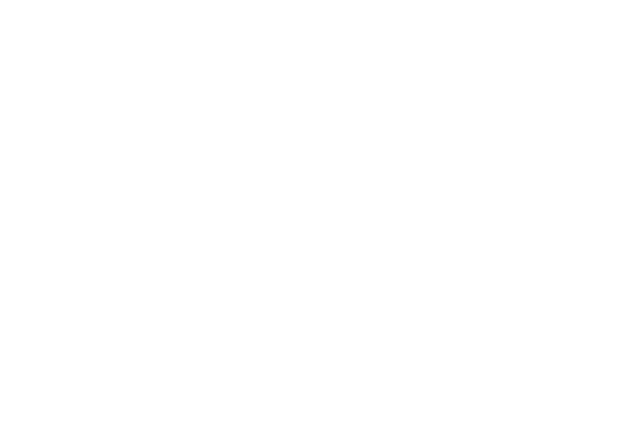

In [46]:
## quick plot to show that BorrowerRate and CreditGrade are pretty much equivalent - drop CreditGrade
reduced_data['BorrowerRate'].hist(by=reduced_data['CreditGrade'])
reduced_data.drop('CreditGrade',axis =1, inplace=True)

In [47]:
## Deal with remaining categorical variables - StrEmploymentStatus,StrOccupation,BoolInGroup and BoolEverWholeLoan
#pd.get_dummies(reduced_data['CreditGrade'])
label_encoder = preprocessing.LabelEncoder()

# Convert Sex variable to numeric
reduced_data["BoolInGroup"] = label_encoder.fit_transform(reduced_data["BoolInGroup"])
reduced_data["BoolEverWholeLoan"] = label_encoder.fit_transform(reduced_data["BoolEverWholeLoan"])
reduced_data.head()

,EnumListingStatus,DolLoanAmountRequested,BoolPartialFundingApproved,BorrowerRate,NumMonthsTerm,FICOScore,EnumListingCategory,DolMonthlyIncome,FracDebtToIncomeRatio,StrEmploymentStatus,StrOccupation,NumMonthsEmployed,DolPriorProsperLoansPrincipalBorrowed,NumPriorProsperLoansLateCycles,NumPriorProsperLoansLatePayments,NumPriorProsperLoans61dpd,BoolIsLender,BoolInGroup,EnumChannelCode,NumTradesOpened6,NumOpenTradesDelinqOrPastDue6,NumTradesCurr30DPDOrDerog6,DolTotalBalanceOnPublicRecords,AgeOldestTrade,PctTradesNeverDelinquent,DolTotalAvailBankcardCredit6,NumRealEstateTrades,DolTotalBalanceOpenRevolving6,DolMonthlyDebt,NumCurrentDelinquencies,NumPublicRecordsLast10Years,NumPublicRecords12,DolAmountDelinquent,NumCurrentCreditLines,PctBankcardUtil,NumTotalInquiries,BoolEverWholeLoan,DaysSinceFirstCredit
ListingNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
973605,7,15000.0,True,0.1620,60,689,1,6000.0000,0.27,Employed,Tradesman - Mechanic,445.0,NaN,NaN,NaN,NaN,0,0,70000,1,0,0,0,419,96,439,2,33956,1242,0,0,0,0,11,0.97,5,1,13898
981099,7,15000.0,True,0.1585,60,709,1,7916.6667,0.35,Other,NaN,32.0,NaN,NaN,NaN,NaN,0,0,70000,1,0,0,0,430,100,9609,2,14852,2289,0,0,0,0,15,0.48,3,1,14235
1025766,6,4000.0,True,0.2085,36,669,1,2083.3333,0.53,Employed,Professional,4.0,14400.0,0.0,0.0,NaN,0,0,80000,0,0,0,0,100,86,1498,0,20802,911,0,0,0,0,8,0.93,5,0,4143
1003835,7,10000.0,True,0.1299,36,749,13,3750.0000,0.14,Employed,Medical Technician,2.0,NaN,NaN,NaN,NaN,0,0,90000,1,0,0,0,60,100,6050,0,3100,223,0,0,0,0,7,0.26,1,1,2939
1011335,6,20000.0,True,0.1440,60,649,1,9000.0000,0.16,Employed,Executive,90.0,2600.0,2.0,0.0,NaN,0,0,80000,1,0,0,1249,237,90,739,1,5519,1264,1,2,0,0,11,0.81,17,0,8326


In [48]:
## the probability of loan cancellation actually seems to vary a lot by profession
jobs = reduced_data.groupby('StrOccupation')
jobs['EnumListingStatus'].mean()[0:]

StrOccupation
Accountant/CPA                        6.289733
Administrative Assistant              6.305882
Analyst                               6.230218
Architect                             6.291925
Attorney                              6.319324
Biologist                             6.303191
Bus Driver                            6.424473
Car Dealer                            6.391241
Chemist                               6.314465
Civil Service                         6.231803
Clergy                                6.456621
Clerical                              6.309499
Computer Programmer                   6.227259
Construction                          6.397276
Dentist                               6.505556
Doctor                                6.417600
Engineer - Chemical                   6.364865
Engineer - Electrical                 6.269855
Engineer - Mechanical                 6.289251
Executive                             6.340349
Fireman                               6.290365

In [49]:
## all the professions 
jobs['StrEmploymentStatus'].value_counts(normalize = True)

StrOccupation                StrEmploymentStatus
Accountant/CPA               Employed               0.928640
                             Self-employed          0.065162
                             Full-time              0.003179
                             Other                  0.003020
Administrative Assistant     Employed               0.973428
                             Self-employed          0.018661
                             Full-time              0.006085
                             Other                  0.001826
Analyst                      Employed               0.983428
                             Self-employed          0.014631
                             Full-time              0.001792
                             Other                  0.000149
Architect                    Employed               0.902692
                             Self-employed          0.084886
                             Full-time              0.006211
                             Other  

In [50]:
## trying to figure out what to do with
print(reduced_data["StrEmploymentStatus"].value_counts())
print(reduced_data.groupby("StrEmploymentStatus")['EnumListingStatus'].mean())


Employed         216678
Other             19544
Self-employed     15624
Full-time           614
Part-time             5
Not employed          4
Name: StrEmploymentStatus, dtype: int64
StrEmploymentStatus
Employed         6.329807
Full-time        6.190554
Not employed     6.500000
Other            6.494781
Part-time        6.200000
Self-employed    6.202573
Name: EnumListingStatus, dtype: float64


In [51]:
reduced_data.head()

,EnumListingStatus,DolLoanAmountRequested,BoolPartialFundingApproved,BorrowerRate,NumMonthsTerm,FICOScore,EnumListingCategory,DolMonthlyIncome,FracDebtToIncomeRatio,StrEmploymentStatus,StrOccupation,NumMonthsEmployed,DolPriorProsperLoansPrincipalBorrowed,NumPriorProsperLoansLateCycles,NumPriorProsperLoansLatePayments,NumPriorProsperLoans61dpd,BoolIsLender,BoolInGroup,EnumChannelCode,NumTradesOpened6,NumOpenTradesDelinqOrPastDue6,NumTradesCurr30DPDOrDerog6,DolTotalBalanceOnPublicRecords,AgeOldestTrade,PctTradesNeverDelinquent,DolTotalAvailBankcardCredit6,NumRealEstateTrades,DolTotalBalanceOpenRevolving6,DolMonthlyDebt,NumCurrentDelinquencies,NumPublicRecordsLast10Years,NumPublicRecords12,DolAmountDelinquent,NumCurrentCreditLines,PctBankcardUtil,NumTotalInquiries,BoolEverWholeLoan,DaysSinceFirstCredit
ListingNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
973605,7,15000.0,True,0.1620,60,689,1,6000.0000,0.27,Employed,Tradesman - Mechanic,445.0,NaN,NaN,NaN,NaN,0,0,70000,1,0,0,0,419,96,439,2,33956,1242,0,0,0,0,11,0.97,5,1,13898
981099,7,15000.0,True,0.1585,60,709,1,7916.6667,0.35,Other,NaN,32.0,NaN,NaN,NaN,NaN,0,0,70000,1,0,0,0,430,100,9609,2,14852,2289,0,0,0,0,15,0.48,3,1,14235
1025766,6,4000.0,True,0.2085,36,669,1,2083.3333,0.53,Employed,Professional,4.0,14400.0,0.0,0.0,NaN,0,0,80000,0,0,0,0,100,86,1498,0,20802,911,0,0,0,0,8,0.93,5,0,4143
1003835,7,10000.0,True,0.1299,36,749,13,3750.0000,0.14,Employed,Medical Technician,2.0,NaN,NaN,NaN,NaN,0,0,90000,1,0,0,0,60,100,6050,0,3100,223,0,0,0,0,7,0.26,1,1,2939
1011335,6,20000.0,True,0.1440,60,649,1,9000.0000,0.16,Employed,Executive,90.0,2600.0,2.0,0.0,NaN,0,0,80000,1,0,0,1249,237,90,739,1,5519,1264,1,2,0,0,11,0.81,17,0,8326


In [52]:
print(reduced_data['DolPriorProsperLoansPrincipalBorrowed'])

ListingNumber
973605         NaN
981099         NaN
1025766    14400.0
1003835        NaN
1011335     2600.0
1010105        NaN
1029573     4000.0
1014296        NaN
1009580        NaN
743482         NaN
1013984    25000.0
991147         NaN
996748         NaN
1020431    45000.0
1036179     8000.0
1036020        NaN
1038345    15000.0
1042284    18000.0
1004506        NaN
1004863        NaN
1008013        NaN
1026668        NaN
1012066        NaN
1061826     7000.0
1055967        NaN
1041188        NaN
1042166        NaN
1061793        NaN
1018846        NaN
1037213    45000.0
            ...   
2572142        NaN
2467335        NaN
2572427        NaN
2572514        NaN
2572571        NaN
2572568        NaN
2572628        NaN
2572661    15000.0
2714871        NaN
2572811        NaN
2315462    16800.0
2572970        NaN
2573003        NaN
2573066        NaN
2573075        NaN
2573081        NaN
2573096        NaN
2573144        NaN
2714997        NaN
2573201        NaN
2573345        Na

In [53]:
## Handle NaN values with sklearn's imputer - DolPriorProsperLoansPrincipalBorrowed, NumPriorProsperLoansLateCycles,
#NumPriorProsperLoansLatePayments and NumPriorProsperLoans61dpd

print(reduced_data.isnull().any())

## two more columns feature a small amount of NaNs: FracDebtToIncomeRatio and NumMonthsEmployed

##from looking at NumPriorProsperLoans61dpd, probably need to handle that variable differently - only 50 non-Nan values
## handle the first 3 variables together first.
imp = preprocessing.Imputer(missing_values="NaN",strategy='mean',axis=0)

#replace nans with column mean
test_out = imp.fit_transform(reduced_data[['DolPriorProsperLoansPrincipalBorrowed', 'NumPriorProsperLoansLateCycles',\
                     'NumPriorProsperLoansLatePayments','FracDebtToIncomeRatio','NumMonthsEmployed']])

reduced_data['DolPriorProsperLoansPrincipalBorrowed'] = test_out[:,0]
reduced_data['NumPriorProsperLoansLateCycles'] = test_out[:,1]
reduced_data['NumPriorProsperLoansLatePayments'] = test_out[:,2]
reduced_data['FracDebtToIncomeRatio'] = test_out[:,3]
reduced_data['NumMonthsEmployed'] = test_out[:,4]

#Having a loan over 61 days past due is a rare event - should expect 0, not mean of actual observations!
reduced_data['NumPriorProsperLoans61dpd'].fillna(0, inplace = True)

EnumListingStatus                        False
DolLoanAmountRequested                   False
BoolPartialFundingApproved               False
BorrowerRate                             False
NumMonthsTerm                            False
FICOScore                                False
EnumListingCategory                      False
DolMonthlyIncome                         False
FracDebtToIncomeRatio                     True
StrEmploymentStatus                      False
StrOccupation                             True
NumMonthsEmployed                         True
DolPriorProsperLoansPrincipalBorrowed     True
NumPriorProsperLoansLateCycles            True
NumPriorProsperLoansLatePayments          True
NumPriorProsperLoans61dpd                 True
BoolIsLender                             False
BoolInGroup                              False
EnumChannelCode                          False
NumTradesOpened6                         False
NumOpenTradesDelinqOrPastDue6            False
NumTradesCurr

In [54]:
reduced_data.head()

,EnumListingStatus,DolLoanAmountRequested,BoolPartialFundingApproved,BorrowerRate,NumMonthsTerm,FICOScore,EnumListingCategory,DolMonthlyIncome,FracDebtToIncomeRatio,StrEmploymentStatus,StrOccupation,NumMonthsEmployed,DolPriorProsperLoansPrincipalBorrowed,NumPriorProsperLoansLateCycles,NumPriorProsperLoansLatePayments,NumPriorProsperLoans61dpd,BoolIsLender,BoolInGroup,EnumChannelCode,NumTradesOpened6,NumOpenTradesDelinqOrPastDue6,NumTradesCurr30DPDOrDerog6,DolTotalBalanceOnPublicRecords,AgeOldestTrade,PctTradesNeverDelinquent,DolTotalAvailBankcardCredit6,NumRealEstateTrades,DolTotalBalanceOpenRevolving6,DolMonthlyDebt,NumCurrentDelinquencies,NumPublicRecordsLast10Years,NumPublicRecords12,DolAmountDelinquent,NumCurrentCreditLines,PctBankcardUtil,NumTotalInquiries,BoolEverWholeLoan,DaysSinceFirstCredit
ListingNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
973605,7,15000.0,True,0.1620,60,689,1,6000.0000,0.27,Employed,Tradesman - Mechanic,445.0,12310.094987,0.359752,0.03088,0.0,0,0,70000,1,0,0,0,419,96,439,2,33956,1242,0,0,0,0,11,0.97,5,1,13898
981099,7,15000.0,True,0.1585,60,709,1,7916.6667,0.35,Other,NaN,32.0,12310.094987,0.359752,0.03088,0.0,0,0,70000,1,0,0,0,430,100,9609,2,14852,2289,0,0,0,0,15,0.48,3,1,14235
1025766,6,4000.0,True,0.2085,36,669,1,2083.3333,0.53,Employed,Professional,4.0,14400.000000,0.000000,0.00000,0.0,0,0,80000,0,0,0,0,100,86,1498,0,20802,911,0,0,0,0,8,0.93,5,0,4143
1003835,7,10000.0,True,0.1299,36,749,13,3750.0000,0.14,Employed,Medical Technician,2.0,12310.094987,0.359752,0.03088,0.0,0,0,90000,1,0,0,0,60,100,6050,0,3100,223,0,0,0,0,7,0.26,1,1,2939
1011335,6,20000.0,True,0.1440,60,649,1,9000.0000,0.16,Employed,Executive,90.0,2600.000000,2.000000,0.00000,0.0,0,0,80000,1,0,0,1249,237,90,739,1,5519,1264,1,2,0,0,11,0.81,17,0,8326


In [55]:
reduced_data.isnull().any()


EnumListingStatus                        False
DolLoanAmountRequested                   False
BoolPartialFundingApproved               False
BorrowerRate                             False
NumMonthsTerm                            False
FICOScore                                False
EnumListingCategory                      False
DolMonthlyIncome                         False
FracDebtToIncomeRatio                    False
StrEmploymentStatus                      False
StrOccupation                             True
NumMonthsEmployed                        False
DolPriorProsperLoansPrincipalBorrowed    False
NumPriorProsperLoansLateCycles           False
NumPriorProsperLoansLatePayments         False
NumPriorProsperLoans61dpd                False
BoolIsLender                             False
BoolInGroup                              False
EnumChannelCode                          False
NumTradesOpened6                         False
NumOpenTradesDelinqOrPastDue6            False
NumTradesCurr

In [56]:
## SET UP MODEL
X = reduced_data.drop(['EnumListingStatus','StrEmploymentStatus','StrOccupation'],axis = 1, inplace = False)
y = reduced_data['EnumListingStatus']-6

In [57]:
model = linear_model.LogisticRegression()

In [58]:
model = model.fit(X,y)

In [59]:
model.score(X,y)

0.66710368401665154

In [60]:
print(model.coef_)

[[  2.41745994e-05  -2.41222756e-05   1.07983692e-05  -3.88349554e-04
   -1.04148397e-03   9.68931610e-04   1.02238815e-05  -3.00390932e-06
   -6.36270371e-04  -1.15554221e-05   1.20018299e-05   1.68677214e-06
   -2.17091318e-07  -1.81142025e-05  -3.14975419e-06  -2.06978112e-06
    1.41137822e-04   4.59849597e-06   1.97160129e-05   1.55621831e-07
   -1.89815807e-03   1.64708151e-03   6.96495335e-06  -4.56428768e-04
    1.10827710e-06  -3.21554372e-04  -1.77211554e-05  -7.15452578e-05
    2.06899508e-06   3.29650197e-09  -8.92889521e-05  -6.24645630e-05
    1.06975318e-03  -1.94910471e-05   6.38134306e-05]]


In [84]:
list(coeff_df.columns.values)

[0, 1]

In [85]:
coeff_df = pd.DataFrame([X.columns, np.transpose(model.coef_)]).transpose()
coeff_df.rename(columns = {0:'var',1:'coeff'}, inplace = True)
print(coeff_df)

                                      var                 coeff
0                  DolLoanAmountRequested    [2.4174599392e-05]
1              BoolPartialFundingApproved  [-2.41222756192e-05]
2                            BorrowerRate   [1.07983692268e-05]
3                           NumMonthsTerm  [-0.000388349553965]
4                               FICOScore   [-0.00104148397364]
5                     EnumListingCategory   [0.000968931610117]
6                        DolMonthlyIncome   [1.02238815222e-05]
7                   FracDebtToIncomeRatio  [-3.00390931674e-06]
8                       NumMonthsEmployed  [-0.000636270370546]
9   DolPriorProsperLoansPrincipalBorrowed  [-1.15554221464e-05]
10         NumPriorProsperLoansLateCycles    [1.2001829943e-05]
11       NumPriorProsperLoansLatePayments   [1.68677213716e-06]
12              NumPriorProsperLoans61dpd  [-2.17091318002e-07]
13                           BoolIsLender  [-1.81142024793e-05]
14                            BoolInGrou

In [62]:
print(coeff_df[coeff_df[1] > .00001])

                                 0                    1
0           DolLoanAmountRequested   [2.4174599392e-05]
2                     BorrowerRate  [1.07983692268e-05]
5              EnumListingCategory  [0.000968931610117]
6                 DolMonthlyIncome  [1.02238815222e-05]
10  NumPriorProsperLoansLateCycles   [1.2001829943e-05]
16                NumTradesOpened6  [0.000141137821745]
18      NumTradesCurr30DPDOrDerog6  [1.97160128669e-05]
21        PctTradesNeverDelinquent    [0.0016470815098]
32               NumTotalInquiries   [0.00106975318044]
34            DaysSinceFirstCredit  [6.38134306488e-05]


In [63]:
predicted = model.predict(X)


In [66]:
indices = [i for i, x in enumerate(predicted) if x == 1]
print(indices)


[170, 235, 258, 334, 434, 547, 575, 598, 646, 647, 648, 649, 697, 700, 705, 710, 749, 750, 751, 782, 1114, 1211, 1306, 1368, 1428, 1486, 1492, 1568, 1614, 1646, 1647, 1648, 1663, 1704, 1750, 1862, 1920, 2063, 2202, 2273, 2285, 2506, 2945, 2952, 2953, 3040, 3117, 3209, 3227, 3378, 3531, 3623, 3791, 3891, 4005, 4022, 4114, 4155, 4191, 4250, 4284, 4383, 4507, 4512, 4690, 4783, 4872, 4902, 4920, 5164, 5201, 5283, 5445, 5475, 5550, 5654, 5707, 5732, 5851, 5984, 6091, 6237, 6238, 6243, 6244, 6358, 6371, 6596, 6692, 6693, 6862, 6897, 7058, 7074, 7160, 7211, 7244, 7330, 7360, 7371, 7410, 7434, 7476, 7488, 7574, 7625, 7704, 7855, 7856, 7857, 7863, 8000, 8001, 8028, 8065, 8075, 8090, 8140, 8201, 8366, 8378, 8455, 8465, 8532, 8570, 8572, 8647, 8668, 8830, 8892, 8940, 9132, 9230, 9420, 9423, 9477, 9640, 9659, 9797, 9822, 9923, 9940, 10122, 10159, 10192, 10193, 10273, 10293, 10320, 10405, 10486, 10500, 10508, 10511, 10566, 10567, 10601, 10645, 10696, 10744, 10797, 10925, 10930, 10991, 11119, 11411,

In [68]:
probs = model.predict_proba(X)

In [69]:
probs[170]

array([ 0.45459079,  0.54540921])

In [ ]:
reduced_data.iloc[258]

In [ ]:
print(predicted[:1000])

In [70]:
##evaluation metrics
print(metrics.accuracy_score(y, predicted))

0.667103684017


In [71]:
fpr, tpr, thresholds = metrics.roc_curve(y,probs[:,1])

In [72]:
print(thresholds)

[  2.00000000e+00   1.00000000e+00   9.99999979e-01 ...,   4.23935223e-02
   4.01545288e-02   2.21091956e-04]


In [73]:
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

In [76]:
reduced_corr = reduced_data.corr()

<IPython.core.display.Javascript object>


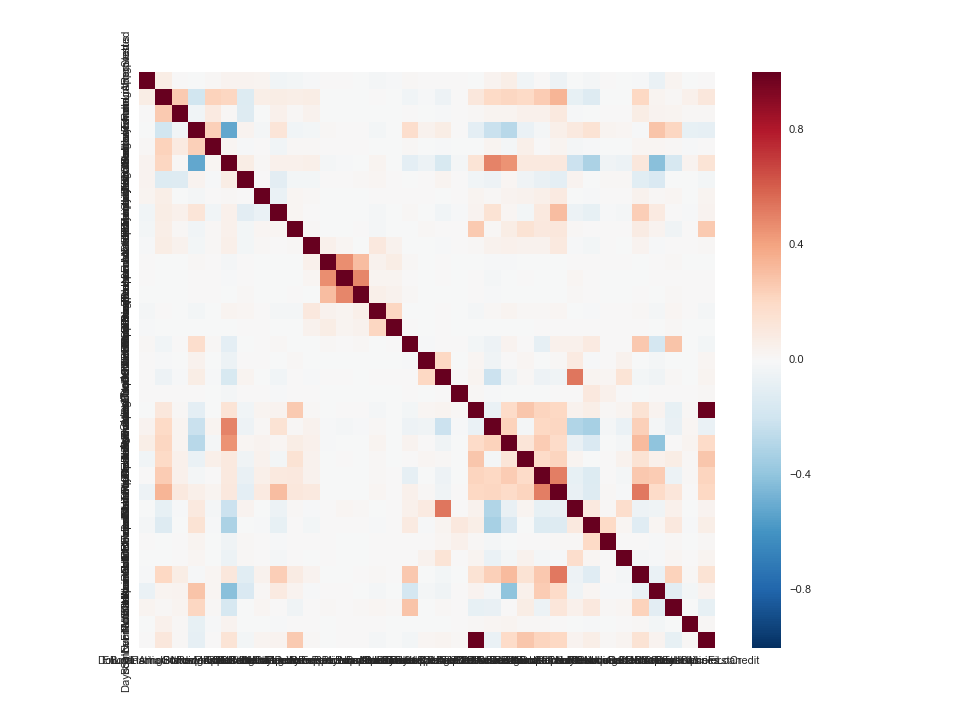

In [77]:
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(reduced_corr, square=True)

In [ ]:
tst = 42

In [ ]:
y.mean()

In [108]:
## cutoffs of .5, .45 and .4 all retrieve pretty similar stuff on second pass. let's stick with .45.
tentative_families = []
cutoff = .45

for name, col in reduced_corr.iteritems():
    
    highly_correlated = (abs(col) > cutoff) & (col.index != name)
    high_corr_list = col[highly_correlated].index.tolist()
    
    if high_corr_list != []:
        tentative_families.append(sorted(high_corr_list + [ name ]))
        
tentative_families.sort()
tentative_families = list(tentative_families for tentative_families,_ in itertools.groupby(tentative_families))

for fam in sorted(tentative_families):
    print(fam)

['AgeOldestTrade', 'DaysSinceFirstCredit']
['BorrowerRate', 'DolTotalAvailBankcardCredit6', 'FICOScore', 'PctTradesNeverDelinquent']
['BorrowerRate', 'FICOScore']
['DolMonthlyDebt', 'DolTotalBalanceOpenRevolving6']
['DolMonthlyDebt', 'DolTotalBalanceOpenRevolving6', 'NumCurrentCreditLines']
['DolMonthlyDebt', 'NumCurrentCreditLines']
['DolTotalAvailBankcardCredit6', 'FICOScore']
['FICOScore', 'PctTradesNeverDelinquent']
['NumCurrentDelinquencies', 'NumTradesCurr30DPDOrDerog6']
['NumPriorProsperLoans61dpd', 'NumPriorProsperLoansLateCycles', 'NumPriorProsperLoansLatePayments']
['NumPriorProsperLoans61dpd', 'NumPriorProsperLoansLatePayments']
['NumPriorProsperLoansLateCycles', 'NumPriorProsperLoansLatePayments']


In [109]:
G = to_graph(tentative_families)
cc = nx.connected_components(G)
families = []

for nodes in cc:
    families.append(list(nodes))
    
families = sorted([ sorted(fam) for fam in families ])
    
for fam in families:
    print(fam, len(fam))
    
ll = [ len(fam) for fam in families ]
print(sum(ll))

['AgeOldestTrade', 'DaysSinceFirstCredit'] 2
['BorrowerRate', 'DolTotalAvailBankcardCredit6', 'FICOScore', 'PctTradesNeverDelinquent'] 4
['DolMonthlyDebt', 'DolTotalBalanceOpenRevolving6', 'NumCurrentCreditLines'] 3
['NumCurrentDelinquencies', 'NumTradesCurr30DPDOrDerog6'] 2
['NumPriorProsperLoans61dpd', 'NumPriorProsperLoansLateCycles', 'NumPriorProsperLoansLatePayments'] 3
14


In [110]:
## let's check how first model ranked coefficients for each of these...
for fam in families:
    qq = [ (lambda x: coeff_df[coeff_df['var'] == x]['coeff'])(x) for x in fam ]
    print(qq)
    
## surprise! current model is junk

[20    [-0.00189815807327]
Name: coeff, dtype: object, 34    [6.38134306488e-05]
Name: coeff, dtype: object]
[2    [1.07983692268e-05]
Name: coeff, dtype: object, 22    [6.96495334762e-06]
Name: coeff, dtype: object, 4    [-0.00104148397364]
Name: coeff, dtype: object, 21    [0.0016470815098]
Name: coeff, dtype: object]
[25    [-0.00032155437201]
Name: coeff, dtype: object, 24    [1.10827709722e-06]
Name: coeff, dtype: object, 30    [-8.92889521068e-05]
Name: coeff, dtype: object]
[26    [-1.77211554281e-05]
Name: coeff, dtype: object, 18    [1.97160128669e-05]
Name: coeff, dtype: object]
[12    [-2.17091318002e-07]
Name: coeff, dtype: object, 10    [1.2001829943e-05]
Name: coeff, dtype: object, 11    [1.68677213716e-06]
Name: coeff, dtype: object]


In [111]:
print(families)

[['AgeOldestTrade', 'DaysSinceFirstCredit'], ['BorrowerRate', 'DolTotalAvailBankcardCredit6', 'FICOScore', 'PctTradesNeverDelinquent'], ['DolMonthlyDebt', 'DolTotalBalanceOpenRevolving6', 'NumCurrentCreditLines'], ['NumCurrentDelinquencies', 'NumTradesCurr30DPDOrDerog6'], ['NumPriorProsperLoans61dpd', 'NumPriorProsperLoansLateCycles', 'NumPriorProsperLoansLatePayments']]


In [113]:
## give custom descriptive names to each family
# two items: first, each unit in the family; second, the variable(s) you're going to keep around.
family_dict_2 = {}
family_dict_2['oldest_trade'] = [families[0],'DaysSinceFirstCredit']
family_dict_2['borrower_rate'] = [families[1],'BorrowerRate']
family_dict_2['monthly_debt'] = [families[2],'DolMonthlyDebt']
family_dict_2['current_delinquencies'] = [families[3],'NumCurrentDelinquencies']
family_dict_2['prosper_delinquencies'] = [families[4],'NumPriorProsperLoansLatePayments']

In [114]:
## again, drop similar columns as determined by families
for fam, items in family_dict_2.items():
    drop_cols = list(items[0])
    drop_cols.remove(items[1]) #keep our chosen representative variable for that family
    reduced_data.drop(drop_cols, axis = 1, inplace = True)

In [119]:
reduced_data.head()

,EnumListingStatus,DolLoanAmountRequested,BoolPartialFundingApproved,BorrowerRate,NumMonthsTerm,EnumListingCategory,DolMonthlyIncome,FracDebtToIncomeRatio,StrEmploymentStatus,StrOccupation,NumMonthsEmployed,DolPriorProsperLoansPrincipalBorrowed,NumPriorProsperLoansLatePayments,BoolIsLender,BoolInGroup,EnumChannelCode,NumTradesOpened6,NumOpenTradesDelinqOrPastDue6,DolTotalBalanceOnPublicRecords,NumRealEstateTrades,DolMonthlyDebt,NumCurrentDelinquencies,NumPublicRecordsLast10Years,NumPublicRecords12,DolAmountDelinquent,PctBankcardUtil,NumTotalInquiries,BoolEverWholeLoan,DaysSinceFirstCredit
ListingNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
973605,7,15000.0,True,0.1620,60,1,6000.0000,0.27,Employed,Tradesman - Mechanic,445.0,12310.094987,0.03088,0,0,70000,1,0,0,2,1242,0,0,0,0,0.97,5,1,13898
981099,7,15000.0,True,0.1585,60,1,7916.6667,0.35,Other,NaN,32.0,12310.094987,0.03088,0,0,70000,1,0,0,2,2289,0,0,0,0,0.48,3,1,14235
1025766,6,4000.0,True,0.2085,36,1,2083.3333,0.53,Employed,Professional,4.0,14400.000000,0.00000,0,0,80000,0,0,0,0,911,0,0,0,0,0.93,5,0,4143
1003835,7,10000.0,True,0.1299,36,13,3750.0000,0.14,Employed,Medical Technician,2.0,12310.094987,0.03088,0,0,90000,1,0,0,0,223,0,0,0,0,0.26,1,1,2939
1011335,6,20000.0,True,0.1440,60,1,9000.0000,0.16,Employed,Executive,90.0,2600.000000,0.00000,0,0,80000,1,0,1249,1,1264,1,2,0,0,0.81,17,0,8326


In [120]:
## SET UP NEW MODEL
X_2 = reduced_data.drop(['EnumListingStatus','StrEmploymentStatus','StrOccupation'],axis = 1, inplace = False)
y_2 = reduced_data['EnumListingStatus']-6

In [121]:
model2 = model.fit(X_2,y_2)

In [122]:
model2.score(X_2,y_2)

0.66743639813204791

In [138]:
coeff_df_2 = pd.DataFrame([X_2.columns, np.transpose(model2.coef_)]).transpose()
coeff_df_2.rename(columns = {0:'var',1:'coeff'}, inplace = True)
coeff_df_2['orig'] = coeff_df['coeff']
coeff_df_2['delta'] = coeff_df_2['coeff'] - coeff_df['coeff']

In [155]:
## both gens of the model come up with NumMonthsTerm, EnumListingCategory, NumMonthsEmployed, DolMonthlyDebt and
## NumTotalInquiries as consistent heavily weighted projectors. I don't have strong intuition about what should matter
# most, but a few of these seem like red herrings, and maybe DolMonthlyDebt, NumMonthsEmployed and NumTotalInquiries
# have some verisimilitude.

print(coeff_df[abs(coeff_df['coeff']) > .0001]['var'])
print(coeff_df_2[abs(coeff_df_2['coeff']) > .0001]['var'])

print(corr['EnumListingStatus'])

print(corr['EnumListingStatus'][['NumMonthsTerm','EnumListingCategory','NumMonthsEmployed','DolMonthlyDebt','NumTotalInquiries']])

3                NumMonthsTerm
4                    FICOScore
5          EnumListingCategory
8            NumMonthsEmployed
16            NumTradesOpened6
20              AgeOldestTrade
21    PctTradesNeverDelinquent
23         NumRealEstateTrades
25              DolMonthlyDebt
32           NumTotalInquiries
Name: var, dtype: object
3           NumMonthsTerm
4     EnumListingCategory
7       NumMonthsEmployed
17         DolMonthlyDebt
23      NumTotalInquiries
Name: var, dtype: object
ListingID                                  -0.047446
EnumListingStatus                           1.000000
DolLoanAmountRequested                      0.075315
BoolPartialFundingApproved                  0.000953
LenderYield                                -0.121828
BorrowerRate                               -0.006793
NumMonthsTerm                               0.014387
DolMonthlyLoanPayment                       0.077843
FICOScore                                   0.037387
ProsperScore                     

In [133]:
print(coeff_df_2)

                                      var                 coeff  \
0                  DolLoanAmountRequested   [2.49318172694e-05]   
1              BoolPartialFundingApproved  [-8.52948564262e-06]   
2                            BorrowerRate   [1.72592143097e-07]   
3                           NumMonthsTerm  [-0.000330695258418]   
4                     EnumListingCategory   [0.000137578972016]   
5                        DolMonthlyIncome   [1.12976988384e-05]   
6                   FracDebtToIncomeRatio   [-1.9842157817e-06]   
7                       NumMonthsEmployed  [-0.000632997343346]   
8   DolPriorProsperLoansPrincipalBorrowed  [-4.22503327907e-05]   
9        NumPriorProsperLoansLatePayments   [1.70890682213e-07]   
10                           BoolIsLender  [-2.31497779562e-06]   
11                            BoolInGroup  [-4.55172259923e-07]   
12                        EnumChannelCode  [-3.45092011307e-06]   
13                       NumTradesOpened6   [1.92328485545e-05

In [144]:
predicted_2 = model2.predict(X_2)
probs_2 = model2.predict_proba(X_2)

In [148]:
print(probs[:10])
print(probs_2[:10])

[[ 0.72943244  0.27056756]
 [ 0.73486022  0.26513978]
 [ 0.72411791  0.27588209]
 [ 0.64985744  0.35014256]
 [ 0.6281455   0.3718545 ]
 [ 0.82449883  0.17550117]
 [ 0.66814875  0.33185125]
 [ 0.65958922  0.34041078]
 [ 0.73965207  0.26034793]
 [ 0.62631634  0.37368366]]
[[ 0.71945321  0.28054679]
 [ 0.72117844  0.27882156]
 [ 0.73523421  0.26476579]
 [ 0.64727461  0.35272539]
 [ 0.54912734  0.45087266]
 [ 0.8204804   0.1795196 ]
 [ 0.60146976  0.39853024]
 [ 0.63415459  0.36584541]
 [ 0.73733502  0.26266498]
 [ 0.66806724  0.33193276]]


In [193]:
## quick 3rd dumb model just with the 5 coefficients that popped out in the first 2...really shouldn't be taken seriously

## var set 1
# NumMonthsTerm, FICOScore, EnumListingCategory, NumMonthsEmployed, NumTradesOpened6, AgeOldestTrade, PctTradesNeverDelinquent
# NumRealEstateTrades, DolMonthlyDebt and NumTotalInquiries
X_3 = reduced_data[['NumMonthsTerm', 'BorrowerRate', 'EnumListingCategory', 'NumMonthsEmployed', 'NumTradesOpened6',\
                   'DaysSinceFirstCredit', 'NumRealEstateTrades', 'DolMonthlyDebt', 'NumTotalInquiries']]
y_3 = reduced_data['EnumListingStatus']-6

## var set 2
# NumMonthsTerm, EnumListingCategory, NumMonthsEmployed, DolMonthlyDebt, NumTotalInquiries
X_4 = reduced_data[['NumMonthsTerm', 'EnumListingCategory', 'NumMonthsEmployed', 'DolMonthlyDebt', 'NumTotalInquiries']]
y_4 = reduced_data['EnumListingStatus']-6


In [194]:
## Let's work on how we handle employment, rather than throwing it out entirely as first two models did...
model3 = model.fit(X_3,y_3)

In [195]:
model3.score(X_3,y_3)

0.66563419667365098

In [184]:
model4 = model.fit(X_4,y_4)

In [185]:
model4.score(X_4,y_4)

0.6656500402029556

In [187]:
predicted_3 = model3.predict(X_3)
#probs_3 = model3.predict_proba(X_3)

ValueError: X has 9 features per sample; expecting 5

In [188]:
predicted_4 = model4.predict(X_4)
#probs_4 = model4.predict_proba(X_4)

In [219]:
print(sum(predicted_2 == 1))

1711


In [191]:
coeff_df_4 = pd.DataFrame([X_4.columns, np.transpose(model4.coef_)]).transpose()
print(coeff_df_4)

                     0                     1
0        NumMonthsTerm    [0.00161111128939]
1  EnumListingCategory     [0.0148018135391]
2    NumMonthsEmployed  [-0.000440176078468]
3       DolMonthlyDebt  [-0.000148829957093]
4    NumTotalInquiries     [0.0152712920123]


In [196]:
coeff_df_3 = pd.DataFrame([X_3.columns, np.transpose(model3.coef_)]).transpose()
print(coeff_df_3)

                      0                     1
0         NumMonthsTerm   [-0.00826651701875]
1          BorrowerRate   [-0.00045814901566]
2   EnumListingCategory    [0.00874170388814]
3     NumMonthsEmployed  [-0.000627907381299]
4      NumTradesOpened6  [-6.00154687073e-05]
5  DaysSinceFirstCredit  [-9.83065230977e-06]
6   NumRealEstateTrades   [-0.00723800794365]
7        DolMonthlyDebt  [-0.000189584591045]
8     NumTotalInquiries    [0.00831127659083]


In [197]:
## the weighting of NumMonthsTerm reversed between models...not an especially promising sign. Next step is probably
## to try sklearn's randomized logistic model to see if it can highlight parameters that actually make a difference
reduced_data.head()

,EnumListingStatus,DolLoanAmountRequested,BoolPartialFundingApproved,BorrowerRate,NumMonthsTerm,EnumListingCategory,DolMonthlyIncome,FracDebtToIncomeRatio,StrEmploymentStatus,StrOccupation,NumMonthsEmployed,DolPriorProsperLoansPrincipalBorrowed,NumPriorProsperLoansLatePayments,BoolIsLender,BoolInGroup,EnumChannelCode,NumTradesOpened6,NumOpenTradesDelinqOrPastDue6,DolTotalBalanceOnPublicRecords,NumRealEstateTrades,DolMonthlyDebt,NumCurrentDelinquencies,NumPublicRecordsLast10Years,NumPublicRecords12,DolAmountDelinquent,PctBankcardUtil,NumTotalInquiries,BoolEverWholeLoan,DaysSinceFirstCredit
ListingNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
973605,7,15000.0,True,0.1620,60,1,6000.0000,0.27,Employed,Tradesman - Mechanic,445.0,12310.094987,0.03088,0,0,70000,1,0,0,2,1242,0,0,0,0,0.97,5,1,13898
981099,7,15000.0,True,0.1585,60,1,7916.6667,0.35,Other,NaN,32.0,12310.094987,0.03088,0,0,70000,1,0,0,2,2289,0,0,0,0,0.48,3,1,14235
1025766,6,4000.0,True,0.2085,36,1,2083.3333,0.53,Employed,Professional,4.0,14400.000000,0.00000,0,0,80000,0,0,0,0,911,0,0,0,0,0.93,5,0,4143
1003835,7,10000.0,True,0.1299,36,13,3750.0000,0.14,Employed,Medical Technician,2.0,12310.094987,0.03088,0,0,90000,1,0,0,0,223,0,0,0,0,0.26,1,1,2939
1011335,6,20000.0,True,0.1440,60,1,9000.0000,0.16,Employed,Executive,90.0,2600.000000,0.00000,0,0,80000,1,0,1249,1,1264,1,2,0,0,0.81,17,0,8326


In [202]:
reduced_dummy_1 = pd.concat([reduced_data, pd.get_dummies(reduced_data['StrEmploymentStatus'])], axis=1)
reduced_dummy_1.drop(['StrOccupation','StrEmploymentStatus'], axis=1, inplace = True)
reduced_dummy_1

,EnumListingStatus,DolLoanAmountRequested,BoolPartialFundingApproved,BorrowerRate,NumMonthsTerm,EnumListingCategory,DolMonthlyIncome,FracDebtToIncomeRatio,NumMonthsEmployed,DolPriorProsperLoansPrincipalBorrowed,NumPriorProsperLoansLatePayments,BoolIsLender,BoolInGroup,EnumChannelCode,NumTradesOpened6,NumOpenTradesDelinqOrPastDue6,DolTotalBalanceOnPublicRecords,NumRealEstateTrades,DolMonthlyDebt,NumCurrentDelinquencies,NumPublicRecordsLast10Years,NumPublicRecords12,DolAmountDelinquent,PctBankcardUtil,NumTotalInquiries,BoolEverWholeLoan,DaysSinceFirstCredit,Employed,Full-time,Not employed,Other,Part-time,Self-employed
ListingNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
973605,7,15000.0,True,0.1620,60,1,6000.0000,0.270000,445.0,12310.094987,0.03088,0,0,70000,1,0,0,2,1242,0,0,0,0,0.97,5,1,13898,1,0,0,0,0,0
981099,7,15000.0,True,0.1585,60,1,7916.6667,0.350000,32.0,12310.094987,0.03088,0,0,70000,1,0,0,2,2289,0,0,0,0,0.48,3,1,14235,0,0,0,1,0,0
1025766,6,4000.0,True,0.2085,36,1,2083.3333,0.530000,4.0,14400.000000,0.00000,0,0,80000,0,0,0,0,911,0,0,0,0,0.93,5,0,4143,1,0,0,0,0,0
1003835,7,10000.0,True,0.1299,36,13,3750.0000,0.140000,2.0,12310.094987,0.03088,0,0,90000,1,0,0,0,223,0,0,0,0,0.26,1,1,2939,1,0,0,0,0,0
1011335,6,20000.0,True,0.1440,60,1,9000.0000,0.160000,90.0,2600.000000,0.00000,0,0,80000,1,0,1249,1,1264,1,2,0,0,0.81,17,0,8326,1,0,0,0,0,0
1010105,6,10000.0,True,0.2225,36,1,8416.6667,0.450000,125.0,12310.094987,0.03088,0,0,90000,0,0,0,2,3455,0,0,0,0,0.87,8,1,11039,1,0,0,0,0,0
1029573,6,15000.0,True,0.0809,36,3,6250.0000,0.257345,9.0,4000.000000,0.00000,1,0,80000,1,0,0,2,1488,0,1,0,0,0.00,8,1,11007,0,0,0,0,0,1
1014296,6,7000.0,True,0.0769,36,3,3333.3333,0.160000,22.0,12310.094987,0.03088,0,0,40000,0,0,0,0,308,0,0,0,0,0.05,1,1,3877,1,0,0,0,0,0
1009580,6,5000.0,True,0.1314,36,1,6450.9167,0.150000,268.0,12310.094987,0.03088,0,0,90000,2,0,0,3,846,0,1,0,0,0.82,8,1,9544,1,0,0,0,0,0


In [203]:
reduced_dummy_2 = pd.concat([reduced_data, pd.get_dummies(reduced_data['StrOccupation'])], axis=1)
reduced_dummy_2.drop(['StrOccupation','StrEmploymentStatus'], axis=1, inplace = True)
reduced_dummy_2

,EnumListingStatus,DolLoanAmountRequested,BoolPartialFundingApproved,BorrowerRate,NumMonthsTerm,EnumListingCategory,DolMonthlyIncome,FracDebtToIncomeRatio,NumMonthsEmployed,DolPriorProsperLoansPrincipalBorrowed,NumPriorProsperLoansLatePayments,BoolIsLender,BoolInGroup,EnumChannelCode,NumTradesOpened6,NumOpenTradesDelinqOrPastDue6,DolTotalBalanceOnPublicRecords,NumRealEstateTrades,DolMonthlyDebt,NumCurrentDelinquencies,NumPublicRecordsLast10Years,NumPublicRecords12,DolAmountDelinquent,PctBankcardUtil,NumTotalInquiries,BoolEverWholeLoan,DaysSinceFirstCredit,Accountant/CPA,Administrative Assistant,Analyst,Architect,Attorney,Biologist,Bus Driver,Car Dealer,Chemist,Civil Service,Clergy,Clerical,Computer Programmer,Construction,Dentist,Doctor,Engineer - Chemical,Engineer - Electrical,Engineer - Mechanical,Executive,Fireman,Flight Attendant,Food Service,Food Service Management,Homemaker,Investor,Judge,Laborer,Landscaping,Medical Technician,Military Enlisted,Military Officer,Nurse (LPN),Nurse (RN),Nurse's Aide,Other,Pharmacist,Pilot - Private/Commercial,Police Officer/Correction Officer,Postal Service,Principal,Professional,Professor,Psychologist,Realtor,Religious,Retail Management,Sales - Commission,Sales - Retail,Scientist,Skilled Labor,Social Worker,Student - College Freshman,Student - College Graduate Student,Student - College Junior,Student - College Senior,Student - College Sophomore,Student - Community College,Student - Technical School,Teacher,Teacher's Aide,Tradesman - Carpenter,Tradesman - Electrician,Tradesman - Mechanic,Tradesman - Plumber,Truck Driver,Waiter/Waitress
ListingNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
973605,7,15000.0,True,0.1620,60,1,6000.0000,0.270000,445.0,12310.094987,0.03088,0,0,70000,1,0,0,2,1242,0,0,0,0,0.97,5,1,13898,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
981099,7,15000.0,True,0.1585,60,1,7916.6667,0.350000,32.0,12310.094987,0.03088,0,0,70000,1,0,0,2,2289,0,0,0,0,0.48,3,1,14235,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1025766,6,4000.0,True,0.2085,36,1,2083.3333,0.530000,4.0,14400.000000,0.00000,0,0,80000,0,0,0,0,911,0,0,0,0,0.93,5,0,4143,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1003835,7,10000.0,True,0.1299,36,13,3750.0000,0.140000,2.0,12310.094987,0.03088,0,0,90000,1,0,0,0,223,0,0,0,0,0.26,1,1,2939,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1011335,6,20000.0,True,0.1440,60,1,9000.0000,0.160000,90.0,2600.000000,0.00000,0,0,80000,1,0,1249,1,1264,1,2,0,0,0.81,17,0,8326,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1010105,6,10000.0,True,0.2225,36,1,8416.6667,0.450000,125.0,12310.094987,0.03088,0,0,90000,0,0,0,2,3455,0,0,0,0,0.87,8,1,11039,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1029573,6,15000.0,True,0.0809,36,3,6250.0000,0.257345,9.0,4000.000000,0.00000,1,0,80000,1,0,0,2,1488,0,1,0,0,0.00,8,1,11007,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1014296,6,7000.0,True,0.0769,36,3,3333.3333,0.160000,22.0,12310.094987,0.03088,0,0,40000,0,0,0,0,308,0,0,0,0,0.05,1,1,3877,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1009580,6,5000.0,True,0.1314,36,1,6450.9167,0.150000,268.0,12310.094987,0.03088,0,0,90000,2,0,0,3,846,0,1,0,0,0.82,8,1,9544,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [208]:
dummy_corr_1 = reduced_dummy_1.corr()

In [209]:
dummy_corr_2 = reduced_dummy_2.corr()

<IPython.core.display.Javascript object>


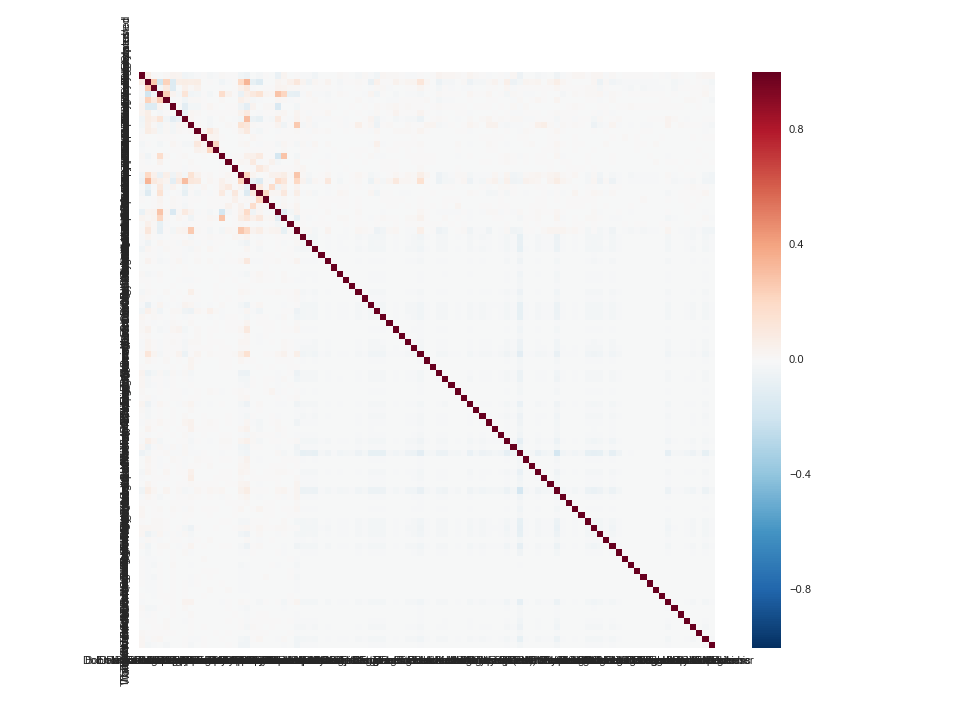

In [211]:
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(dummy_corr_2, square=True)

In [232]:
## SET UP MODEL
X_5 = reduced_dummy_1.drop(['EnumListingStatus'],axis = 1, inplace = False)
y_5 = reduced_data['EnumListingStatus']-6

In [233]:
## SET UP MODEL
X_6 = reduced_dummy_2.drop(['EnumListingStatus'],axis = 1, inplace = False)
y_6 = reduced_data['EnumListingStatus']-6

In [234]:
model5 = model.fit(X_5,y_5)

In [230]:
model5.intercept_

array([ -9.80657338e-05])

In [235]:
coeff_df_5 = pd.DataFrame([X_5.columns, np.transpose(model5.coef_)]).transpose()
print(coeff_df_5)

                                        0                     1
0                  DolLoanAmountRequested   [2.76018399516e-05]
1              BoolPartialFundingApproved  [-0.000256223128994]
2                            BorrowerRate   [1.53700329789e-05]
3                           NumMonthsTerm   [-0.00527991799338]
4                     EnumListingCategory    [0.00433331138171]
5                        DolMonthlyIncome    [1.0781959662e-05]
6                   FracDebtToIncomeRatio  [-6.11846087488e-05]
7                       NumMonthsEmployed  [-0.000623143250703]
8   DolPriorProsperLoansPrincipalBorrowed  [-3.25508764224e-05]
9        NumPriorProsperLoansLatePayments   [6.01964386381e-06]
10                           BoolIsLender  [-7.78383570886e-05]
11                            BoolInGroup  [-1.51710863518e-05]
12                        EnumChannelCode  [-3.14737635488e-06]
13                       NumTradesOpened6   [0.000640974413232]
14          NumOpenTradesDelinqOrPastDue

In [240]:
# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.3, random_state=0)
model7 = linear_model.LogisticRegression()
model7.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [242]:
# predict class labels for the test set
predicted = model7.predict(X_test)
print(predicted[:100])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [243]:
probs = model7.predict_proba(X_test)
print(probs[:100])

[[ 0.64083778  0.35916222]
 [ 0.70961521  0.29038479]
 [ 0.71006622  0.28993378]
 [ 0.6939486   0.3060514 ]
 [ 0.65311955  0.34688045]
 [ 0.60398067  0.39601933]
 [ 0.70545372  0.29454628]
 [ 0.67851069  0.32148931]
 [ 0.66932469  0.33067531]
 [ 0.69373537  0.30626463]
 [ 0.5891025   0.4108975 ]
 [ 0.55320376  0.44679624]
 [ 0.8067856   0.1932144 ]
 [ 0.69300237  0.30699763]
 [ 0.66735288  0.33264712]
 [ 0.60811911  0.39188089]
 [ 0.66602673  0.33397327]
 [ 0.67362217  0.32637783]
 [ 0.75355707  0.24644293]
 [ 0.61960273  0.38039727]
 [ 0.59220218  0.40779782]
 [ 0.66503703  0.33496297]
 [ 0.64711138  0.35288862]
 [ 0.60970668  0.39029332]
 [ 0.63323429  0.36676571]
 [ 0.54813105  0.45186895]
 [ 0.63198661  0.36801339]
 [ 0.62602565  0.37397435]
 [ 0.72095501  0.27904499]
 [ 0.64012168  0.35987832]
 [ 0.67342759  0.32657241]
 [ 0.72660262  0.27339738]
 [ 0.61742681  0.38257319]
 [ 0.62812449  0.37187551]
 [ 0.54746897  0.45253103]
 [ 0.62239318  0.37760682]
 [ 0.69153902  0.30846098]
 

In [245]:
print(metrics.accuracy_score(y_test, predicted))
print(sum(predicted==1))

0.665940507783
498
